## Effect of Macroeconomic and other factors on Housing Price Index

<img src="https://www.investopedia.com/thmb/FdlCU9scxi7X-HVJ1dXv5iJ0u74=/1500x1000/filters:no_upscale():max_bytes(150000):strip_icc()/factors-affecting-real-estate-market.asp_final-8e8ea4cd40dd45909593384700de9759.png" width="600">

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [2]:
import warnings
warnings.filterwarnings('ignore')

# Economic growth.
Demand for housing is dependent upon income. With higher economic growth and rising incomes, people will be able to spend more on houses; this will increase demand and push up prices. In fact, demand for housing is often noted to be income elastic (luxury good); rising incomes leading to a bigger % of income being spent on houses. Similarly, in a recession, falling incomes will mean people can’t afford to buy and those who lose their job may fall behind on their mortgage payments and end up with their home repossessed.
# Unemployment. 
Related to economic growth is unemployment. When unemployment is rising, fewer people will be able to afford a house. But, even the fear of unemployment may discourage people from entering the property market.
# Interest rates. 
Interest rates affect the cost of monthly mortgage payments. A period of high-interest rates will increase cost of mortgage payments and will cause lower demand for buying a house. High-interest rates make renting relatively more attractive compared to buying. Interest rates have a bigger effect if homeowners have large variable mortgages. For example, in 1990-92, the sharp rise in interest rates caused a very steep fall in UK house prices because many homeowners couldn’t afford the rise in interest rates.
# Consumer confidence. 
Confidence is important for determining whether people want to take the risk of taking out a mortgage. In particular expectations towards the housing market is important; if people fear house prices could fall, people will defer buying.
# Inflation
Inflation affects housing prices negatively as it slows demand owing to higher living costs and citizens delaying their home purchase plans.


## Loading Data

In [3]:
data=pd.read_csv('DATA.csv')

In [4]:
data.head()

DATE  UNRATE(%)  CONSUMER CONF INDEX  PPI-CONST MAT.  CPIALLITEMS  \
0  01-05-2022        3.6                106.4         352.857   123.322800   
1  01-04-2022        3.6                107.3         343.730   121.978170   
2  01-03-2022        3.6                107.2         345.852   121.301004   
3  01-02-2022        3.8                110.5         343.583   119.702806   
4  01-01-2022        4.0                113.8         345.742   118.619339   

   INFLATION(%)  MORTGAGE INT. MONTHLY AVG(%)  MED HOUSEHOLD INCOME  \
0      8.581511                        5.2300                   NaN   
1      8.258629                        4.9825                   NaN   
2      8.542456                        4.1720                   NaN   
3      7.871064                        3.7625                   NaN   
4      7.479872                        3.4450                   NaN   

   CORP. BOND YIELD(%)  MONTHLY HOME SUPPLY  % SHARE OF WORKING POPULATION  \
0                 4.13                  8.4                            NaN   
1                 3.76                  8.4                            NaN   
2                 3.43                  7.0                            NaN   
3                 3.25                  6.0                            NaN   
4                 2.93                  5.7                            NaN   

   GDP PER CAPITA  QUARTERLY REAL GDP  QUARTERLY GDP GROWTH RATE (%)  \
0           74737           19699.465                      -0.144227   
1           74737           19699.465                      -0.144227   
2           73289           19727.918                      -0.395692   
3           73289           19727.918                      -0.395692   
4           73289           19727.918                      -0.395692   

   CSUSHPISA  
0    120.724  
1    121.813  
2    122.888  
3    123.831  
4    124.780

In [5]:
data.shape

(241, 15)

## Exploratory Data Analysis

In [6]:
#Statistical Summary of data
data.describe()

UNRATE(%)  CONSUMER CONF INDEX  PPI-CONST MAT.  CPIALLITEMS  \
count  241.000000           241.000000      241.000000   241.000000   
mean     6.074689            90.809544      206.949863    95.539665   
std      1.987058            25.871004       40.479900    11.087025   
min      3.500000            25.000000      143.800000    75.859538   
25%      4.700000            70.400000      183.300000    87.722400   
50%      5.600000            94.500000      206.200000    96.819215   
75%      7.300000           108.200000      221.700000   103.255463   
max     14.700000           138.400000      352.857000   123.322800   

       INFLATION(%)  MORTGAGE INT. MONTHLY AVG(%)  MED HOUSEHOLD INCOME  \
count    241.000000                    241.000000            224.000000   
mean       2.296497                      4.697956          53273.982143   
std        1.641645                      1.119850           7475.321506   
min       -2.097161                      2.684000          42409.000000   
25%        1.463784                      3.802500          49007.250000   
50%        2.070508                      4.457500          50303.000000   
75%        2.969762                      5.812500          59039.000000   
max        8.581511                      6.806000          68703.000000   

       CORP. BOND YIELD(%)  MONTHLY HOME SUPPLY  \
count           241.000000           241.000000   
mean              4.471162             5.974274   
std               1.079004             1.895763   
min               2.140000             3.300000   
25%               3.690000             4.600000   
50%               4.340000             5.500000   
75%               5.410000             6.700000   
max               6.750000            12.200000   

       % SHARE OF WORKING POPULATION  GDP PER CAPITA  QUARTERLY REAL GDP  \
count                     236.000000      241.000000          241.000000   
mean                       66.410104    52896.082988        16536.012095   
std                         0.802918     8840.592318         1708.435162   
min                        64.924129    37860.000000        13477.356000   
25%                        65.623251    46977.000000        15304.517000   
50%                        66.739214    51554.000000        16253.726000   
75%                        67.128435    58745.000000        17896.623000   
max                        67.298433    74737.000000        19806.290000   

       QUARTERLY GDP GROWTH RATE (%)   CSUSHPISA  
count                     241.000000  241.000000  
mean                        0.490060  175.306996  
std                         1.453910   36.780758  
min                        -8.937251  120.724000  
25%                         0.293599  147.395000  
50%                         0.580001  169.812000  
75%                         0.833911  189.707000  
max                         7.547535  304.831000

In [7]:
#Datatypes of data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241 entries, 0 to 240
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   DATE                           241 non-null    object 
 1   UNRATE(%)                      241 non-null    float64
 2   CONSUMER CONF INDEX            241 non-null    float64
 3   PPI-CONST MAT.                 241 non-null    float64
 4   CPIALLITEMS                    241 non-null    float64
 5   INFLATION(%)                   241 non-null    float64
 6   MORTGAGE INT. MONTHLY AVG(%)   241 non-null    float64
 7   MED HOUSEHOLD INCOME           224 non-null    float64
 8   CORP. BOND YIELD(%)            241 non-null    float64
 9   MONTHLY HOME SUPPLY            241 non-null    float64
 10  % SHARE OF WORKING POPULATION  236 non-null    float64
 11  GDP PER CAPITA                 241 non-null    int64  
 12  QUARTERLY REAL GDP             241 non-null    flo

In [8]:
data.isnull().sum()

DATE                              0
UNRATE(%)                         0
CONSUMER CONF INDEX               0
PPI-CONST MAT.                    0
CPIALLITEMS                       0
INFLATION(%)                      0
MORTGAGE INT. MONTHLY AVG(%)      0
MED HOUSEHOLD INCOME             17
CORP. BOND YIELD(%)               0
MONTHLY HOME SUPPLY               0
% SHARE OF WORKING POPULATION     5
GDP PER CAPITA                    0
QUARTERLY REAL GDP                0
QUARTERLY GDP GROWTH RATE (%)     0
CSUSHPISA                         0
dtype: int64

### Making new features for Month and Year from Date

#### Converting Date Feature to Datetime

In [9]:
data['DATE']=pd.to_datetime(data['DATE'])

In [10]:
data['DATE'].dtype

dtype('<M8[ns]')

In [11]:
data['MONTH']=data['DATE'].dt.day
data['YEAR']=data['DATE'].dt.year

In [12]:
data['MONTH'].value_counts()

5     21
4     20
3     20
2     20
1     20
12    20
11    20
10    20
9     20
8     20
7     20
6     20
Name: MONTH, dtype: int64

In [13]:
data1=data.drop(['DATE'],axis=1)

In [14]:
data1.columns

Index(['UNRATE(%)', 'CONSUMER CONF INDEX', 'PPI-CONST MAT.', 'CPIALLITEMS',
       'INFLATION(%)', 'MORTGAGE INT. MONTHLY AVG(%)', 'MED HOUSEHOLD INCOME',
       'CORP. BOND YIELD(%)', 'MONTHLY HOME SUPPLY',
       '% SHARE OF WORKING POPULATION', 'GDP PER CAPITA', 'QUARTERLY REAL GDP',
       'QUARTERLY GDP GROWTH RATE (%)', 'CSUSHPISA', 'MONTH', 'YEAR'],
      dtype='object')

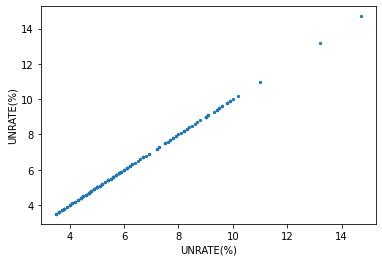

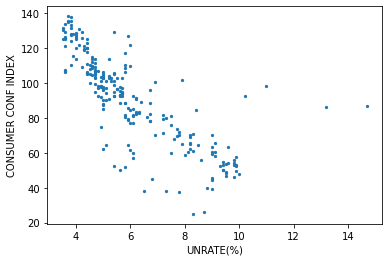

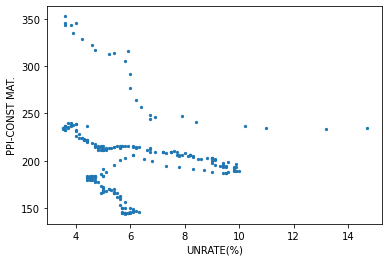

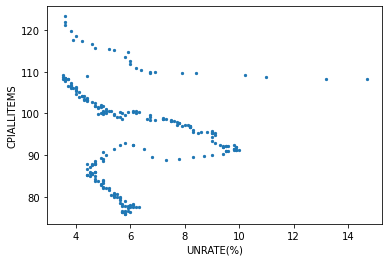

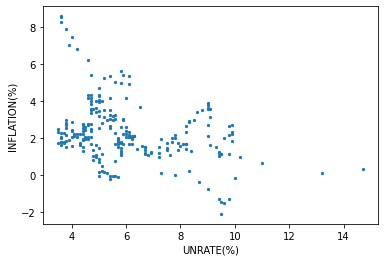

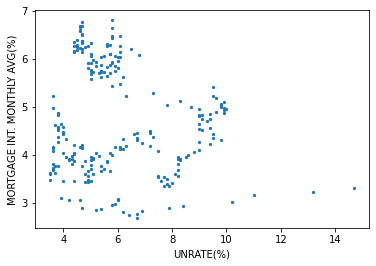

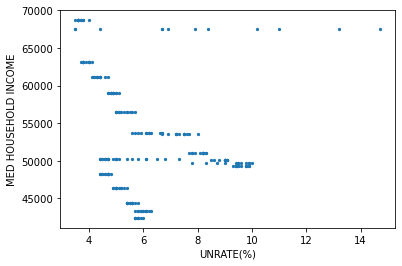

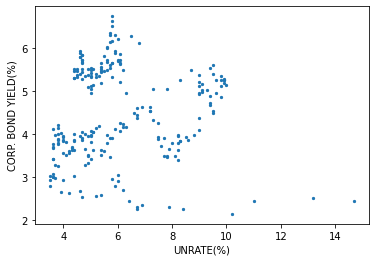

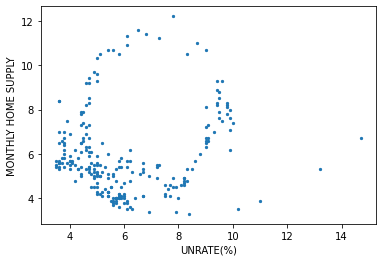

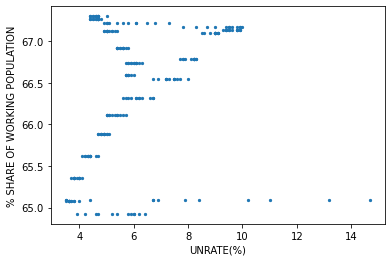

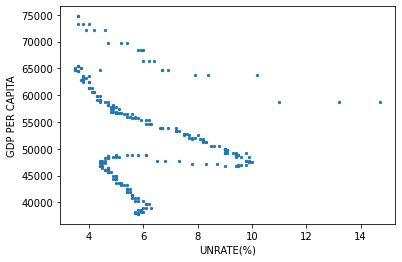

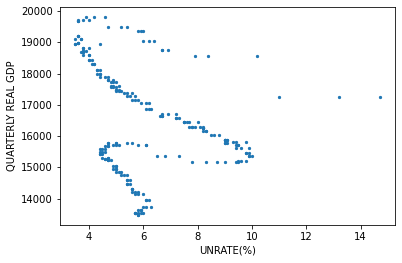

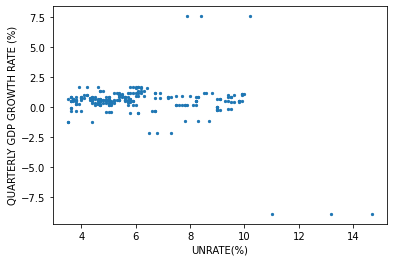

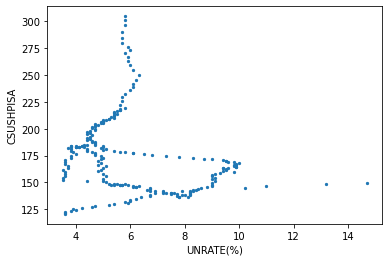

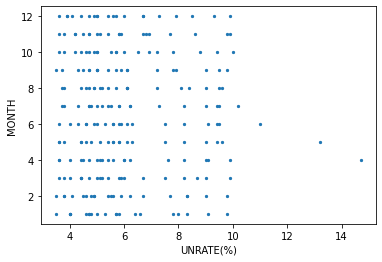

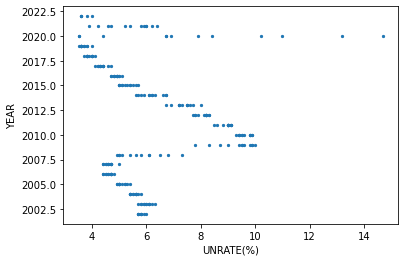

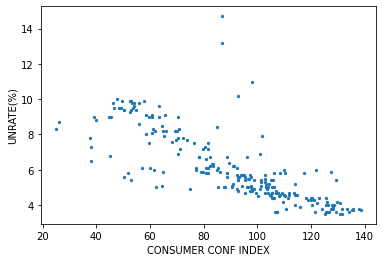

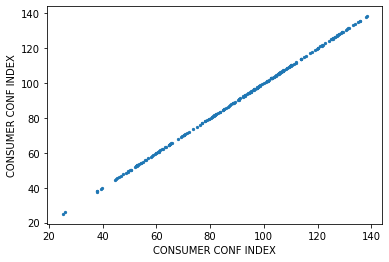

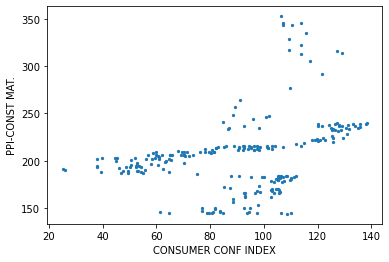

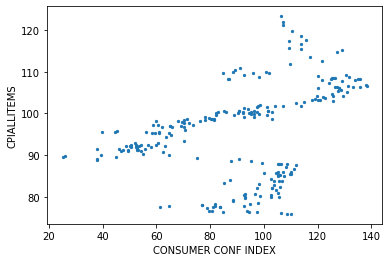

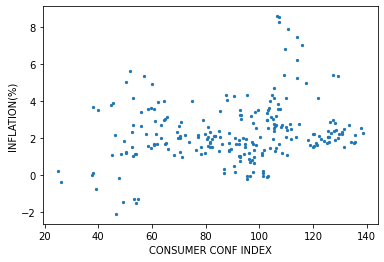

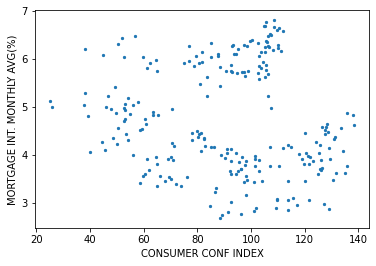

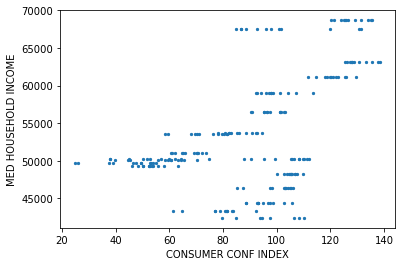

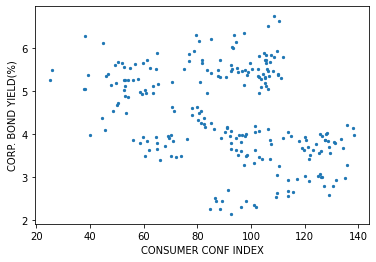

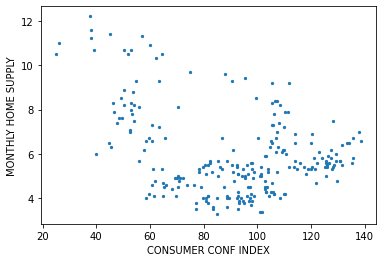

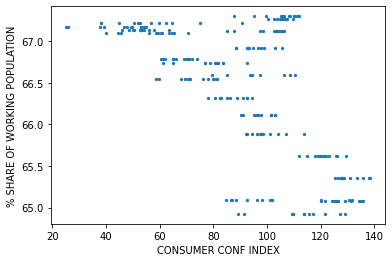

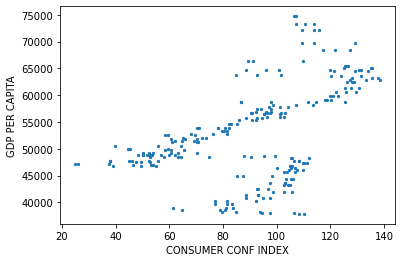

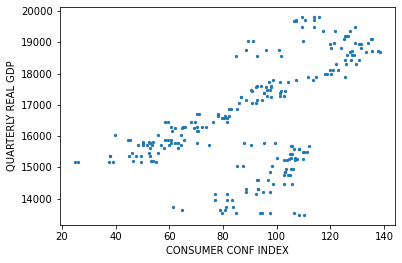

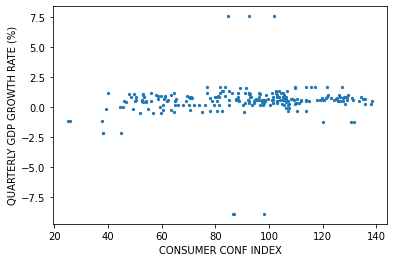

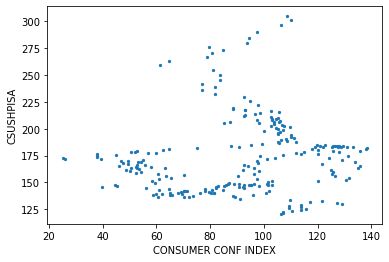

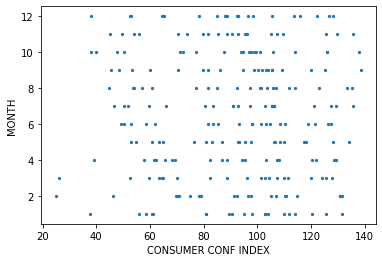

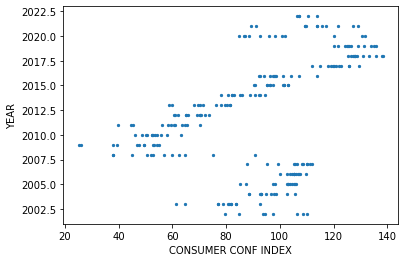

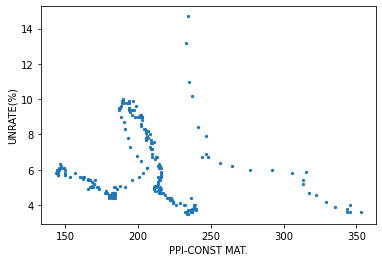

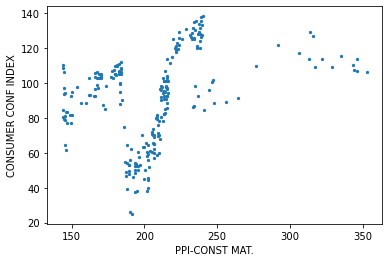

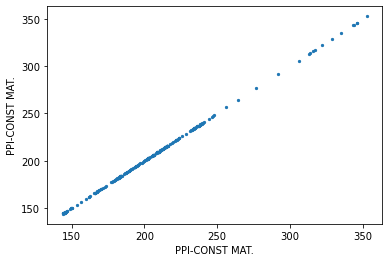

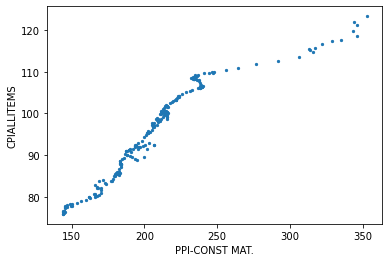

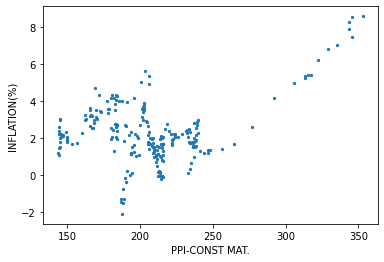

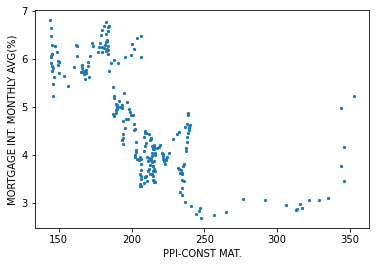

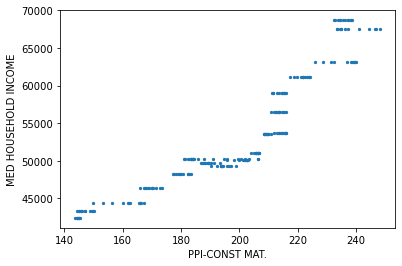

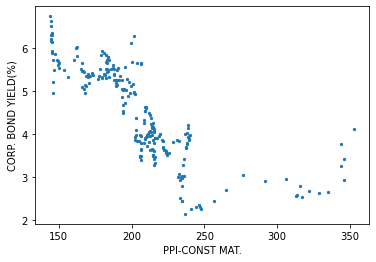

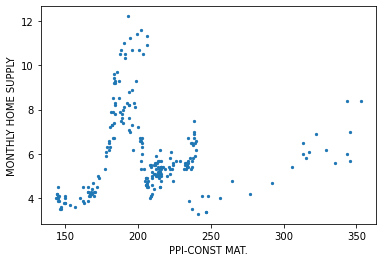

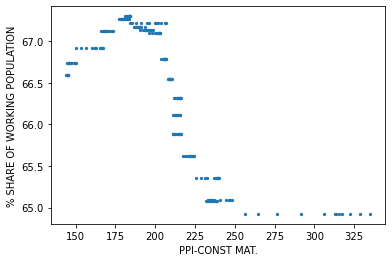

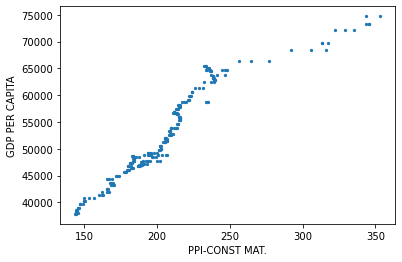

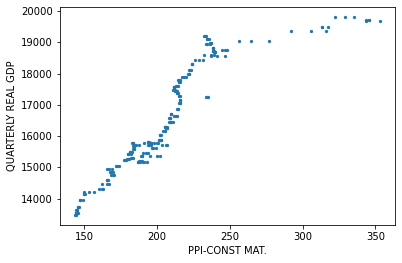

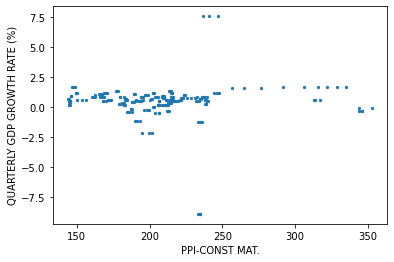

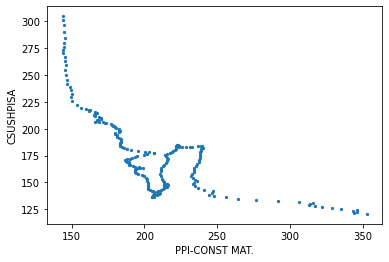

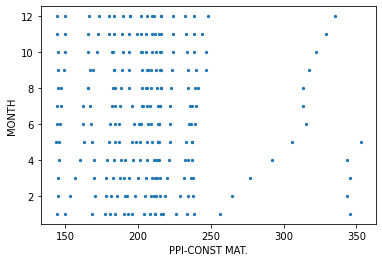

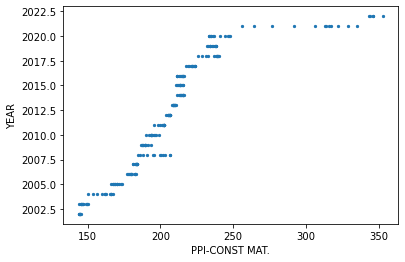

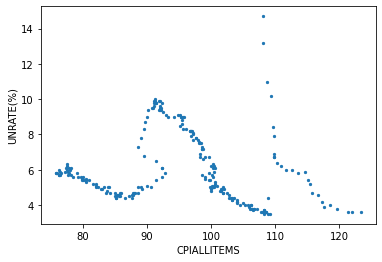

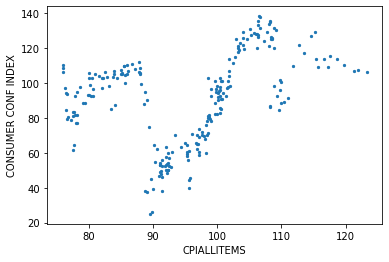

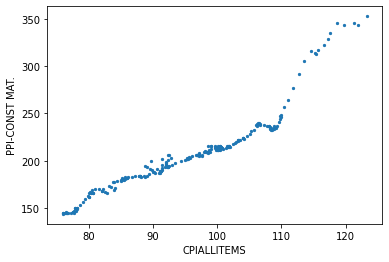

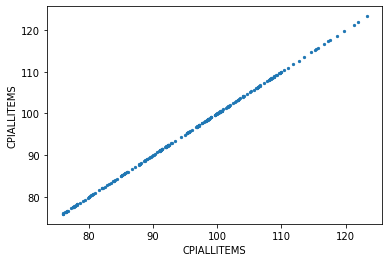

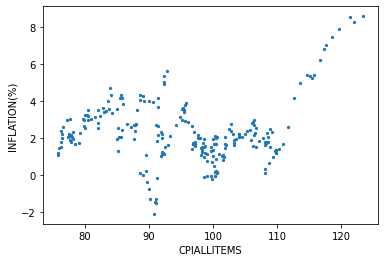

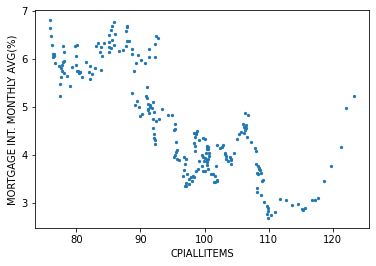

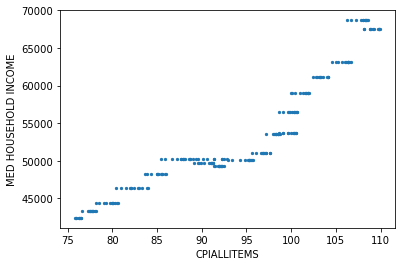

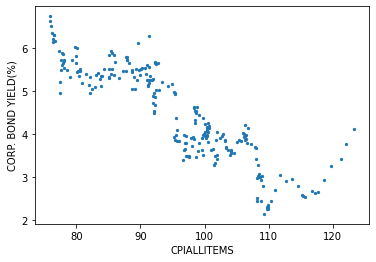

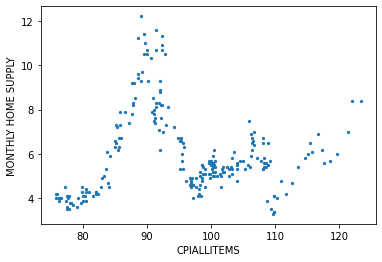

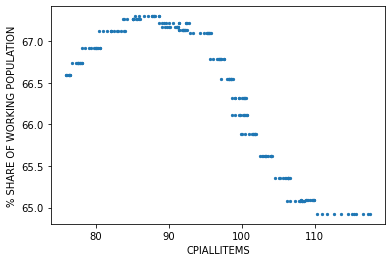

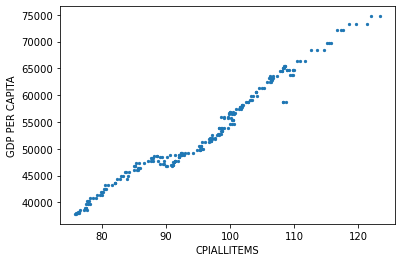

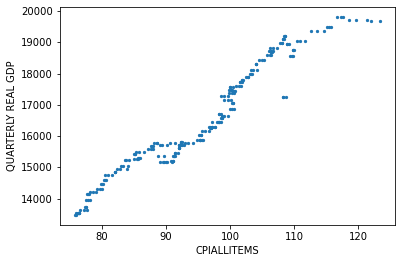

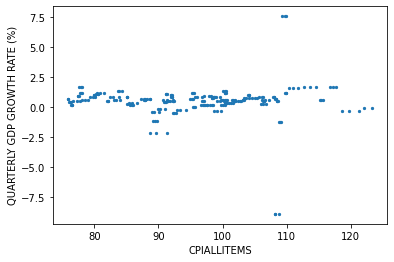

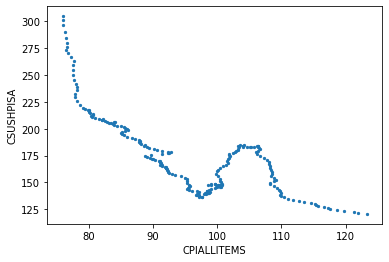

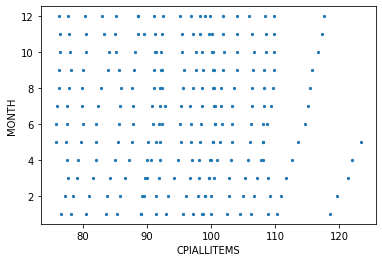

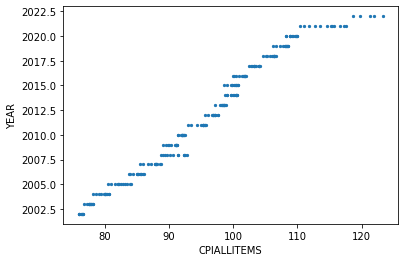

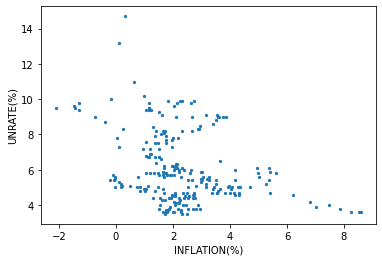

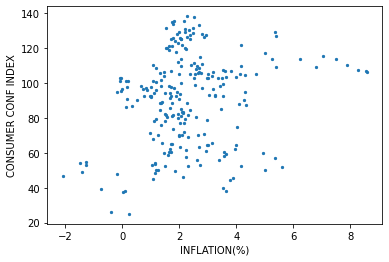

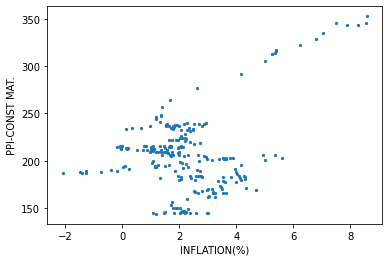

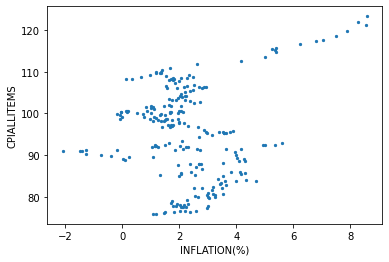

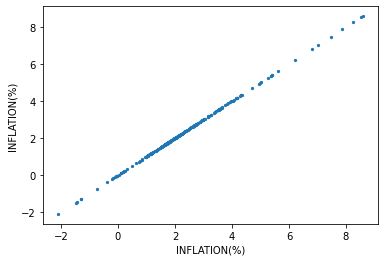

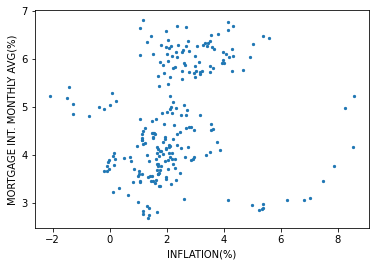

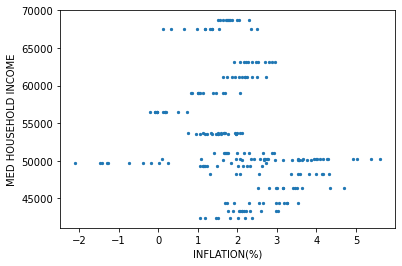

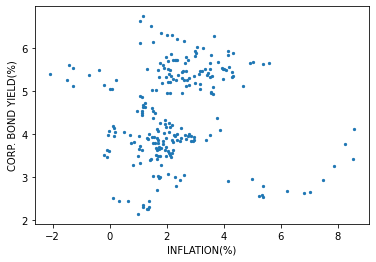

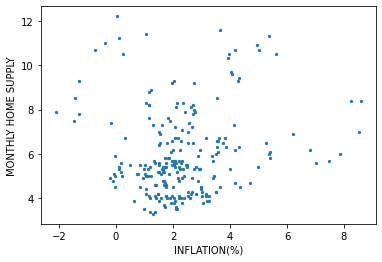

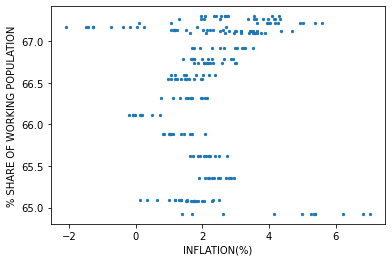

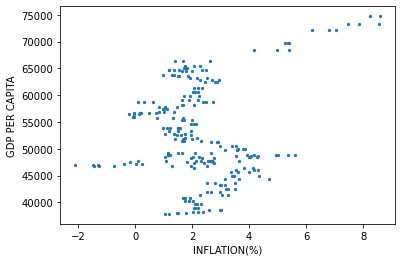

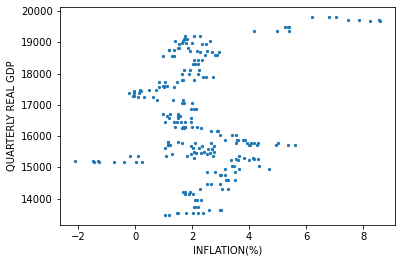

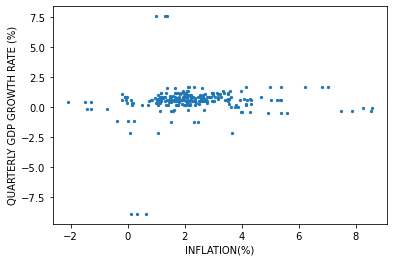

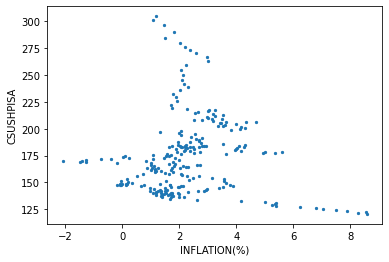

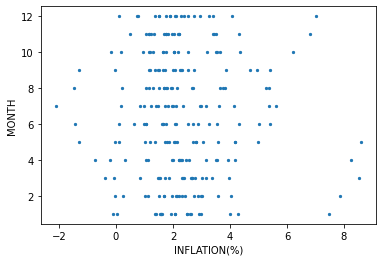

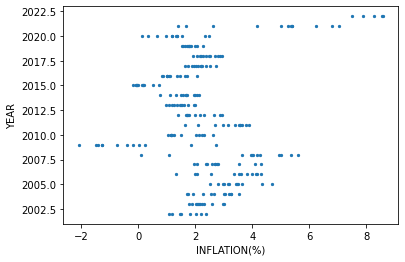

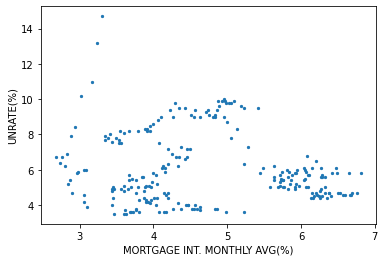

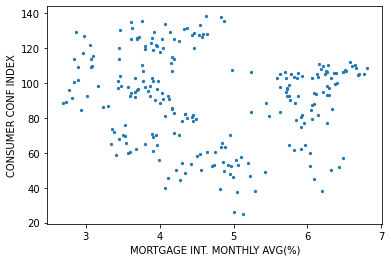

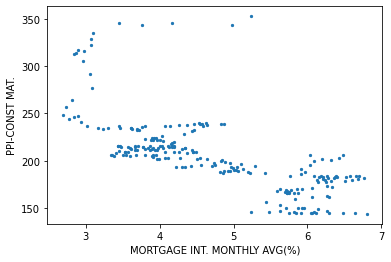

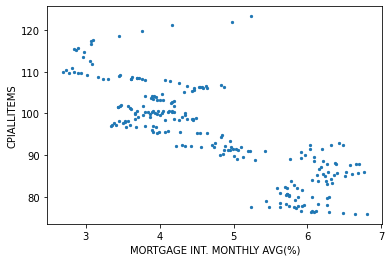

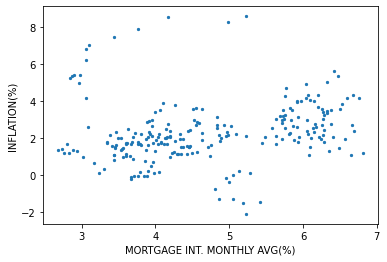

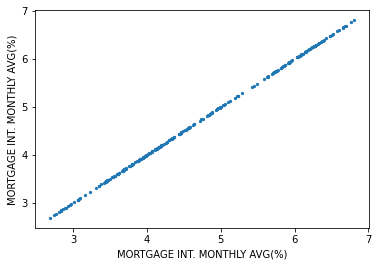

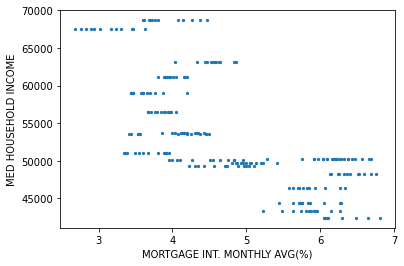

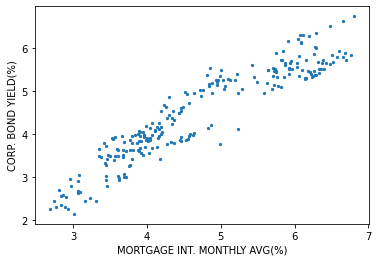

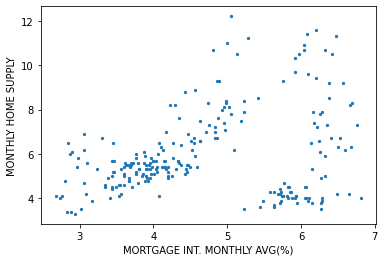

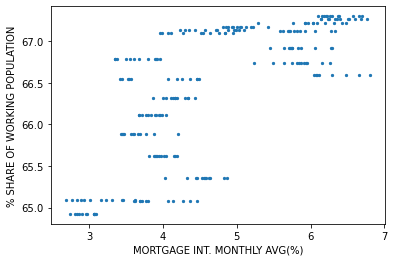

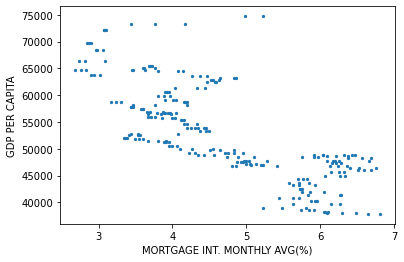

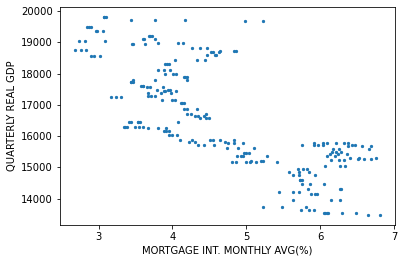

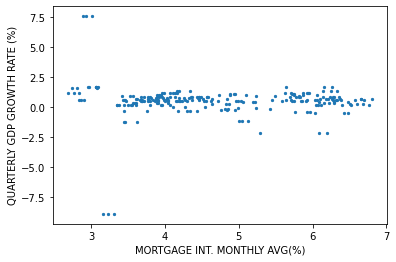

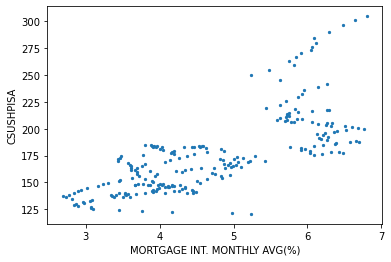

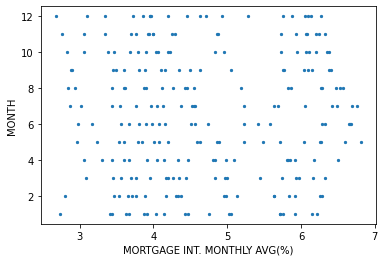

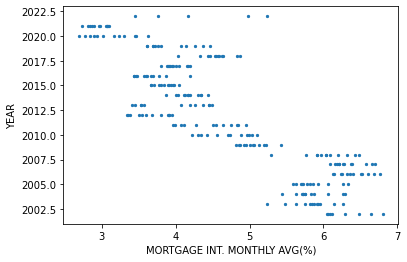

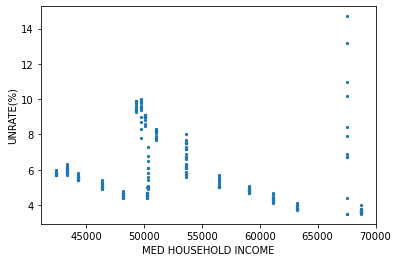

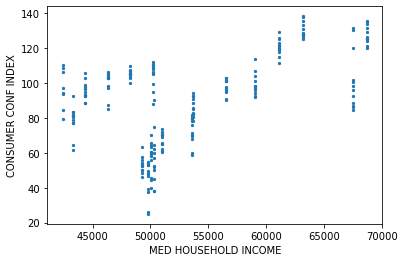

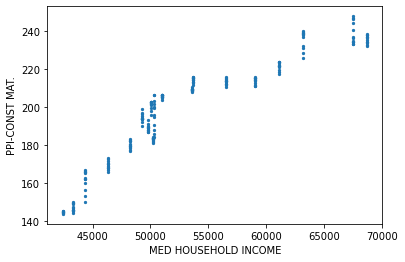

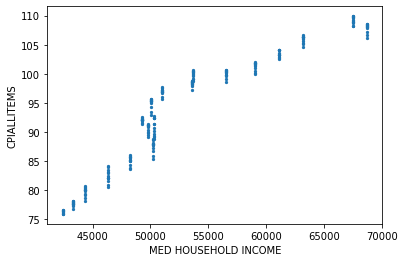

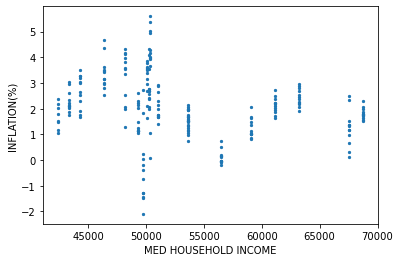

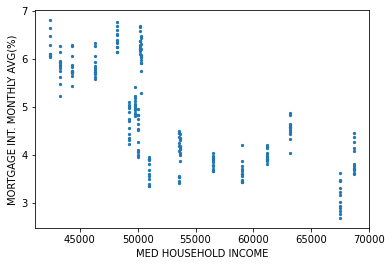

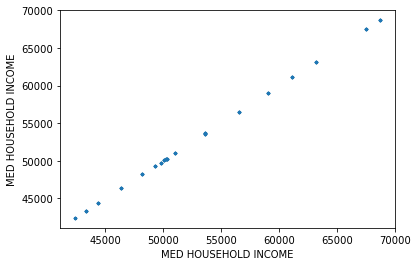

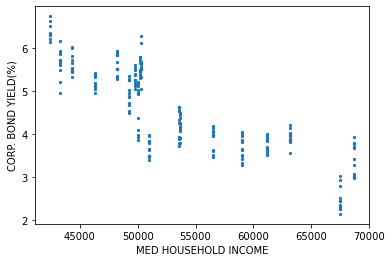

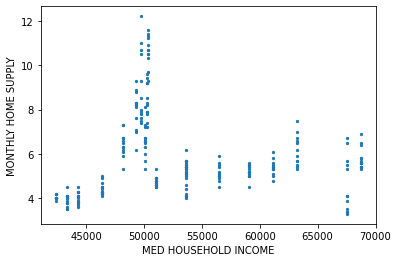

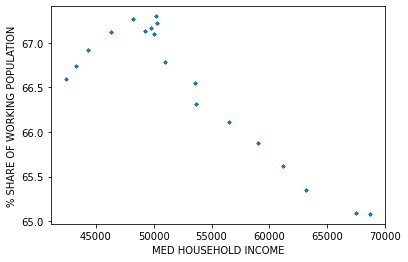

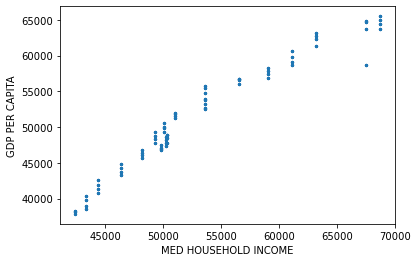

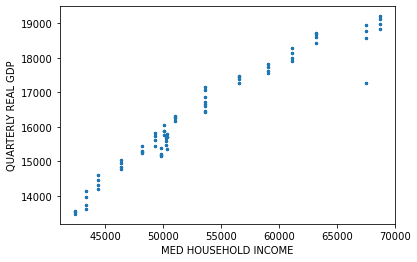

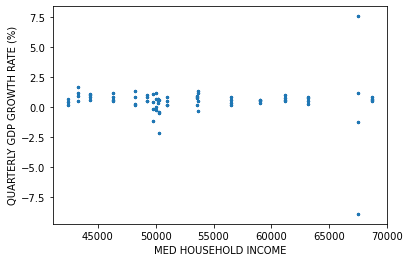

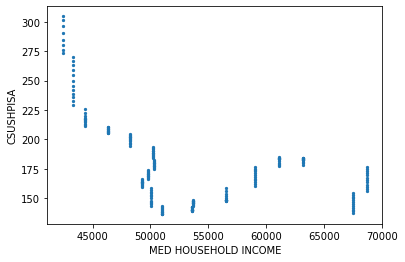

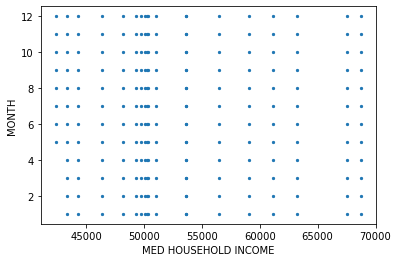

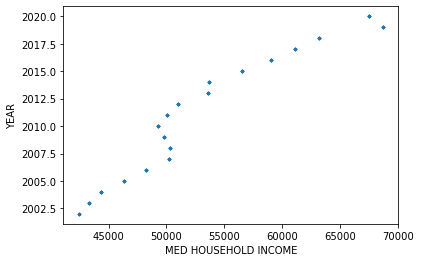

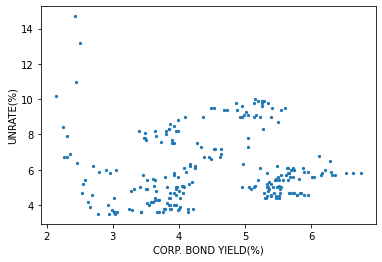

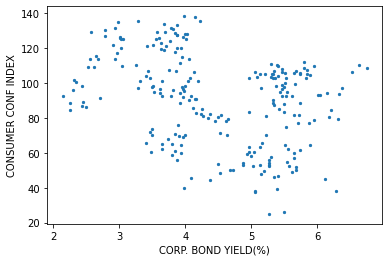

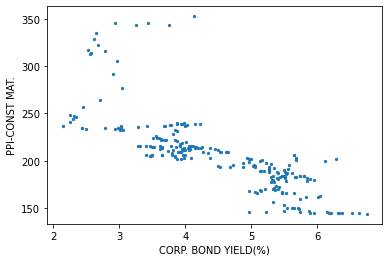

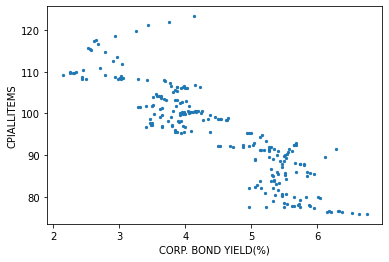

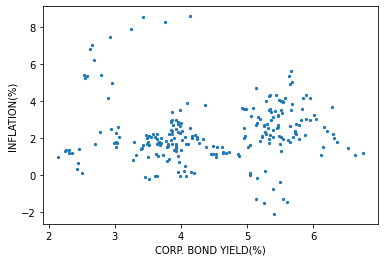

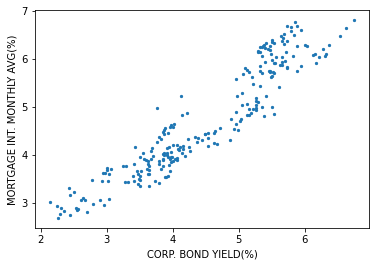

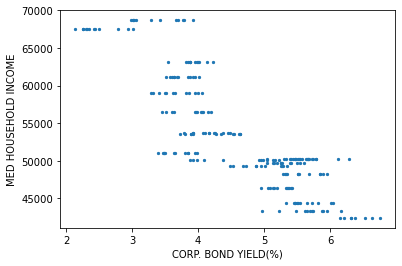

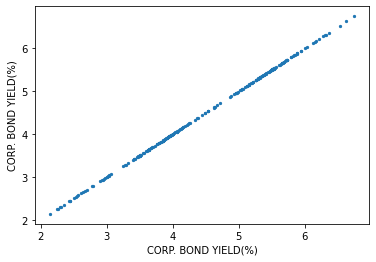

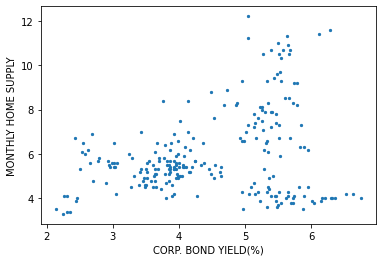

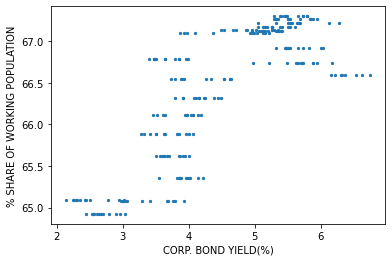

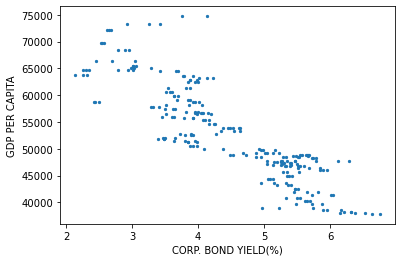

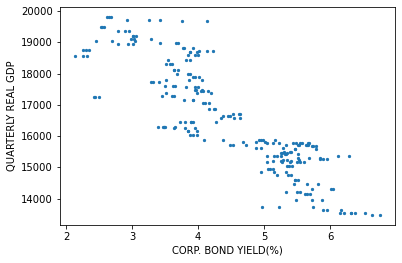

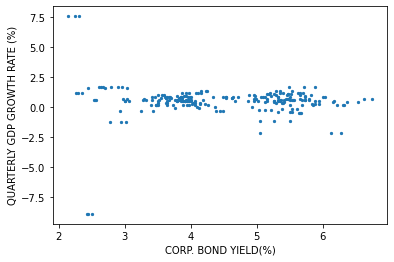

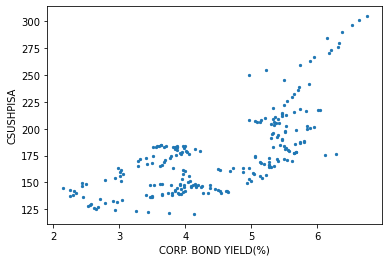

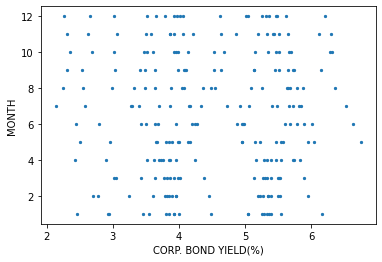

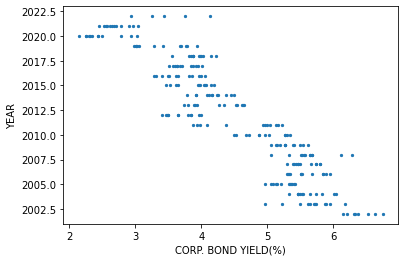

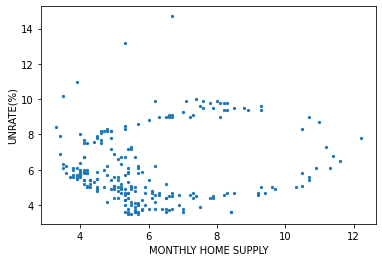

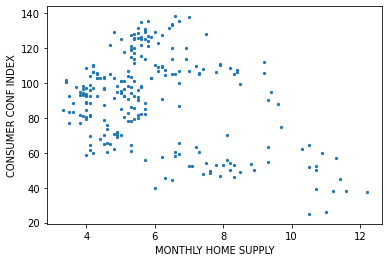

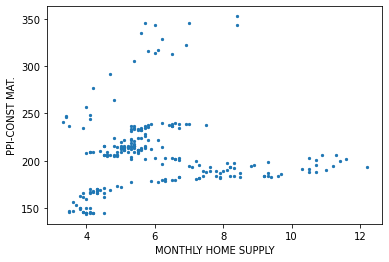

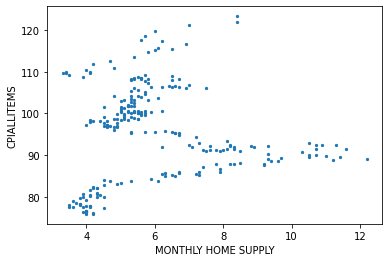

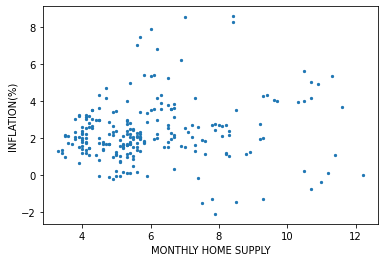

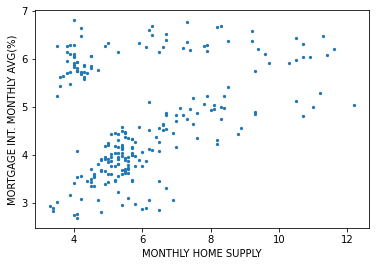

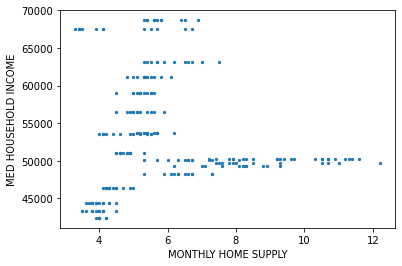

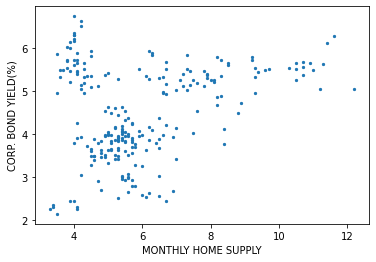

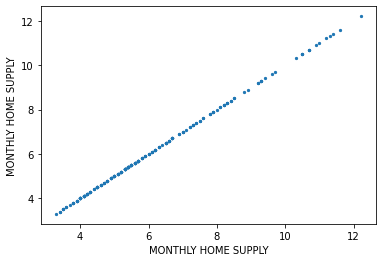

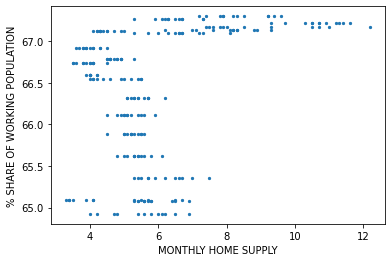

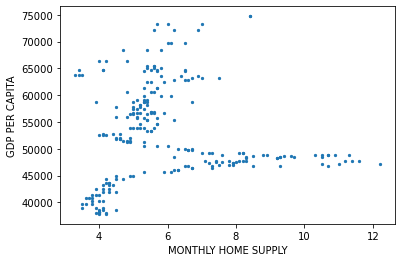

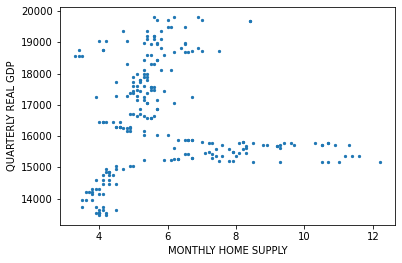

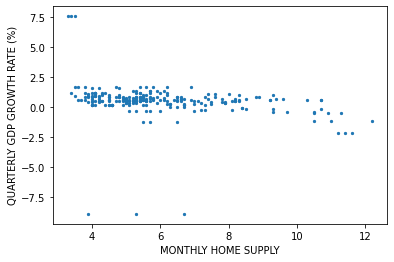

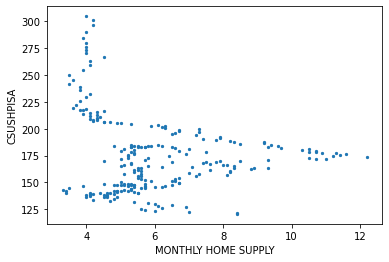

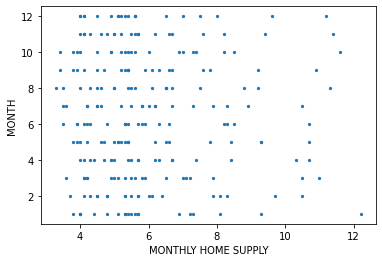

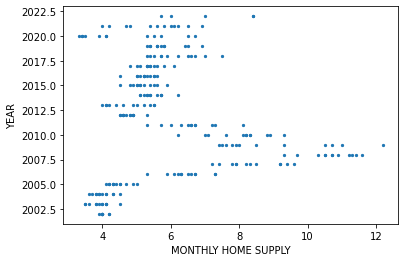

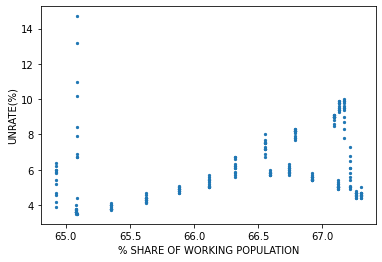

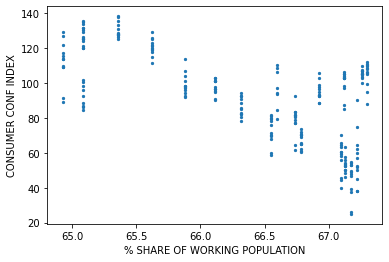

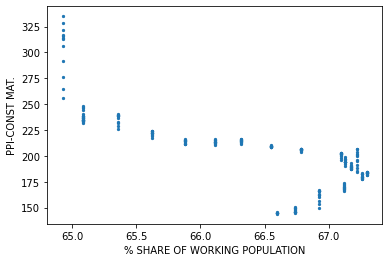

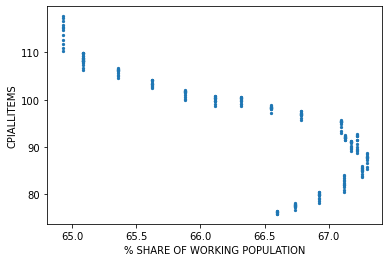

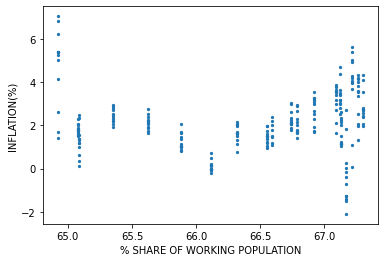

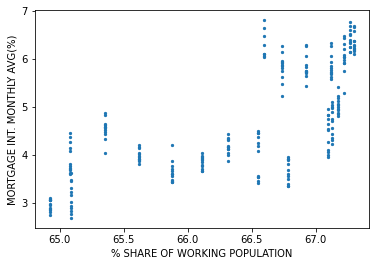

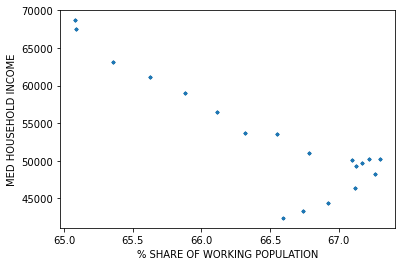

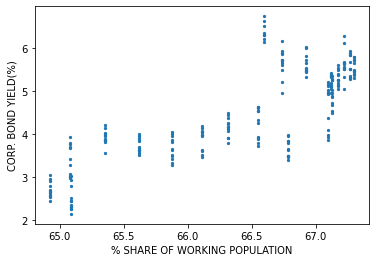

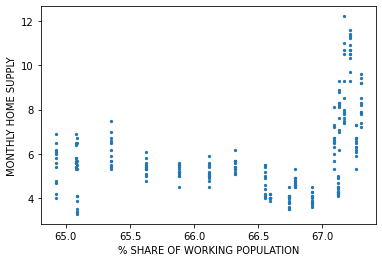

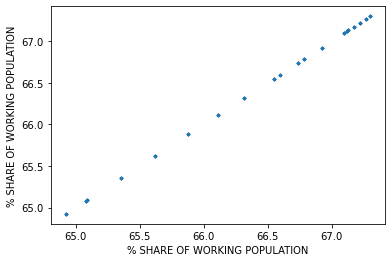

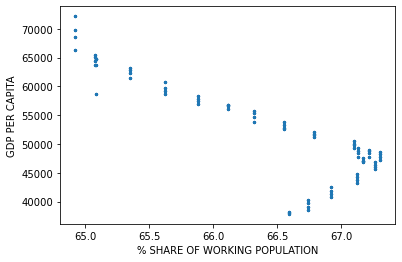

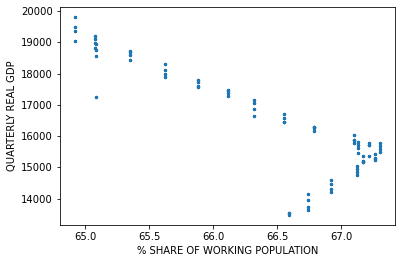

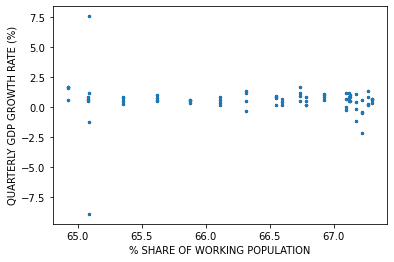

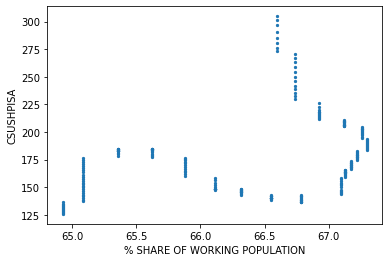

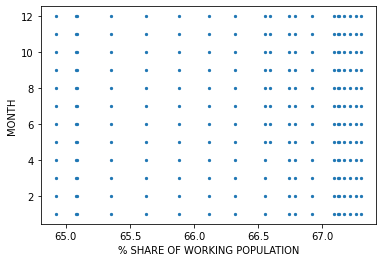

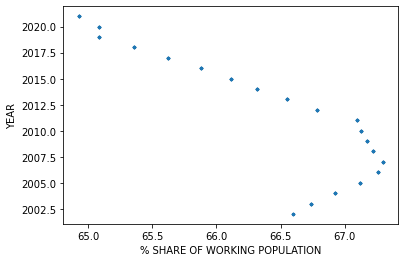

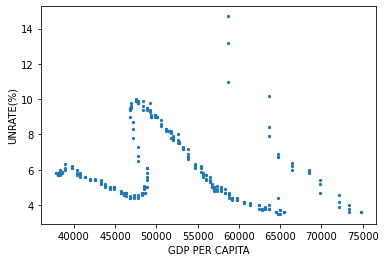

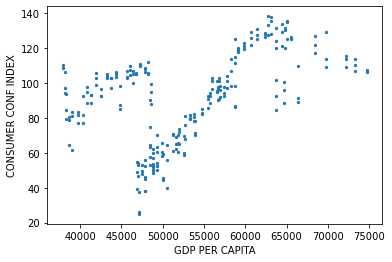

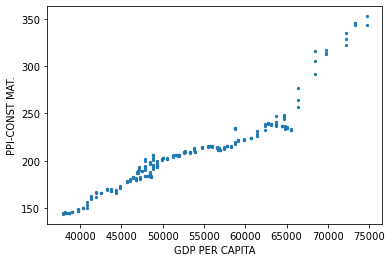

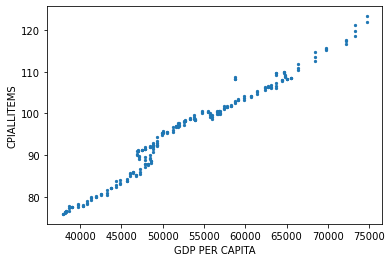

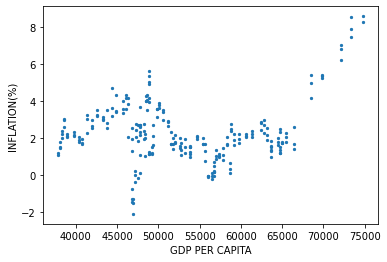

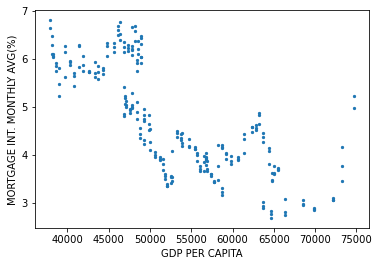

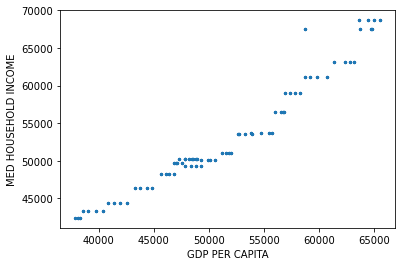

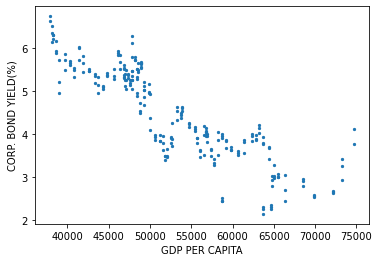

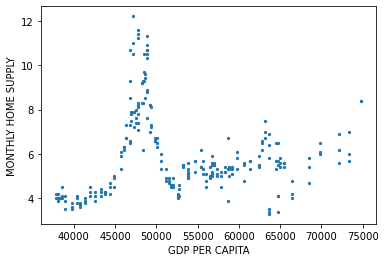

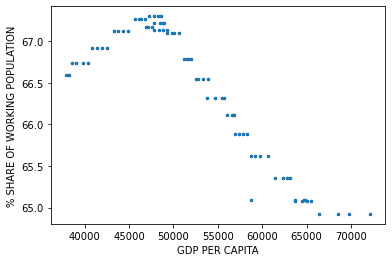

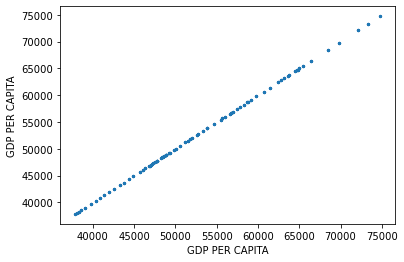

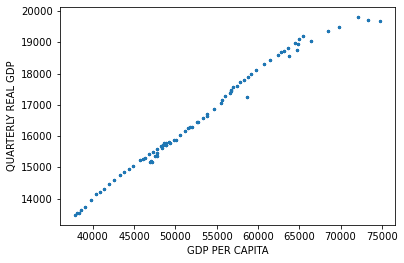

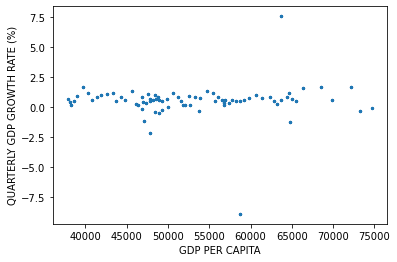

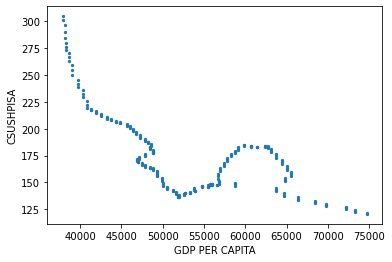

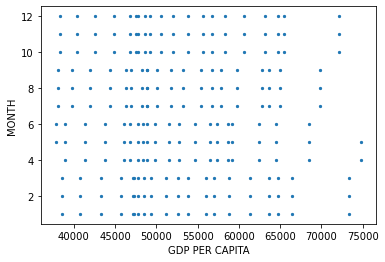

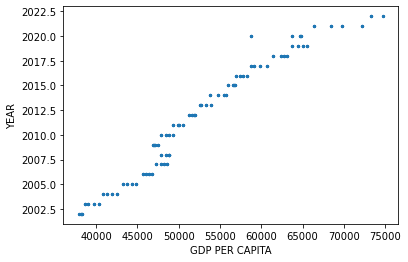

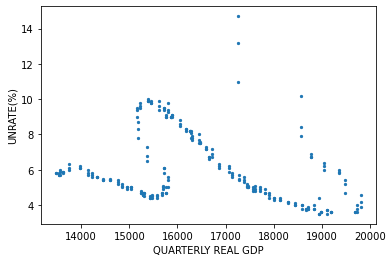

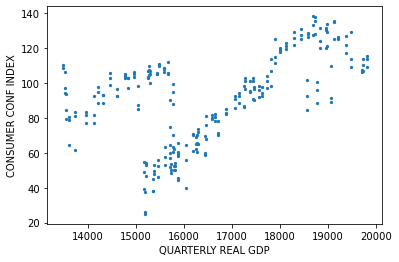

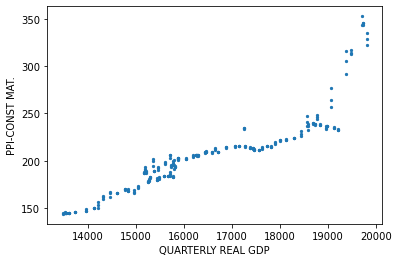

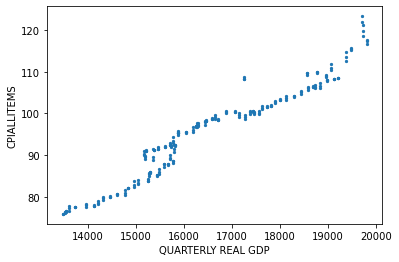

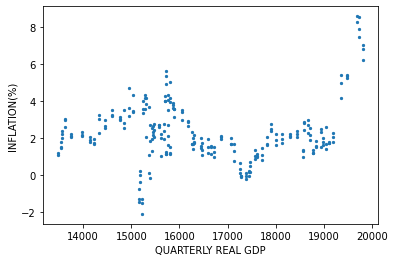

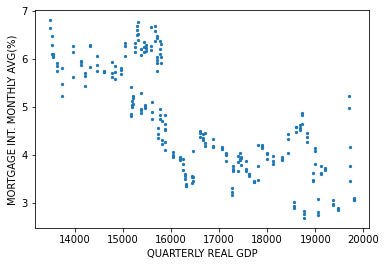

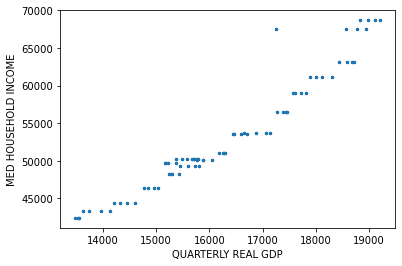

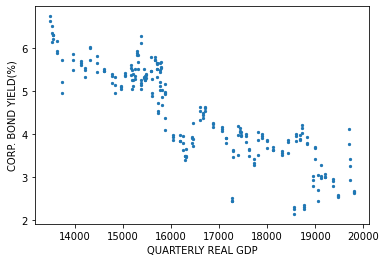

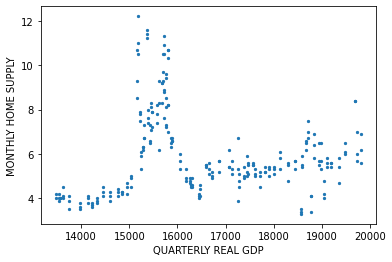

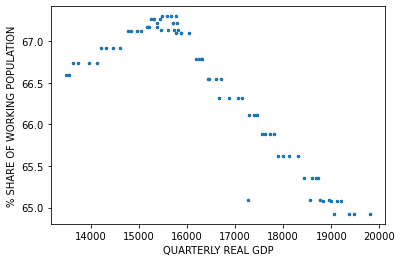

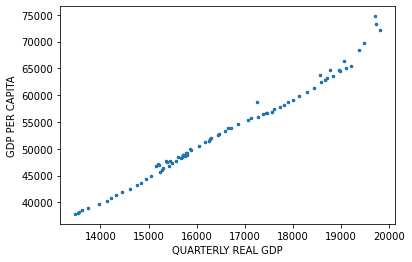

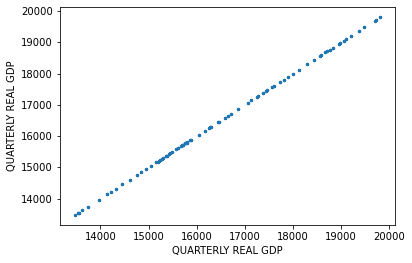

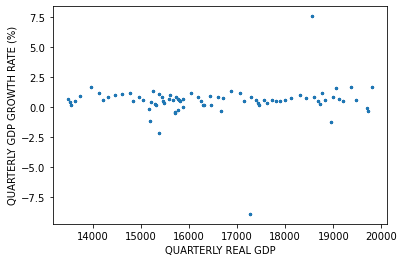

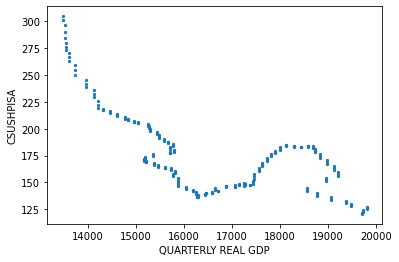

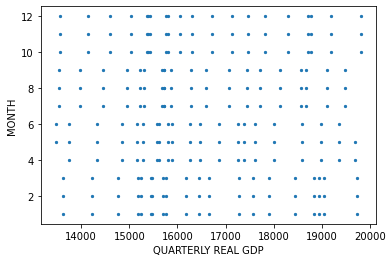

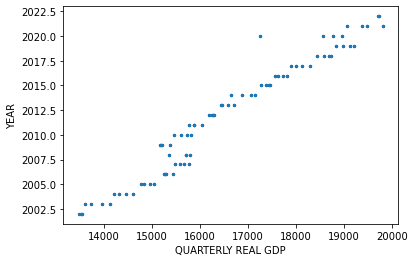

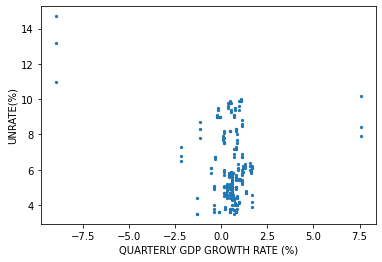

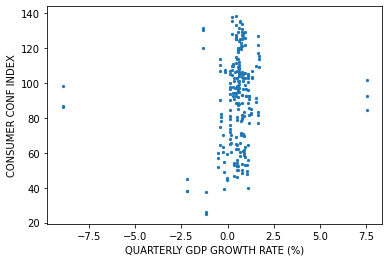

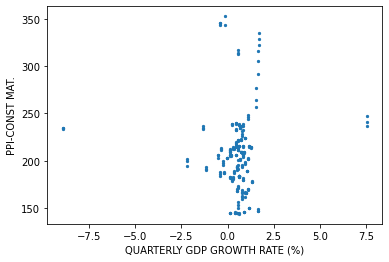

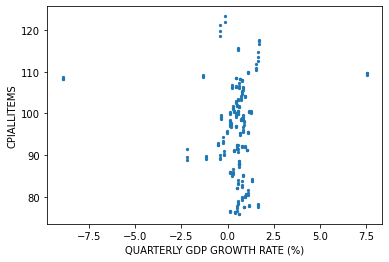

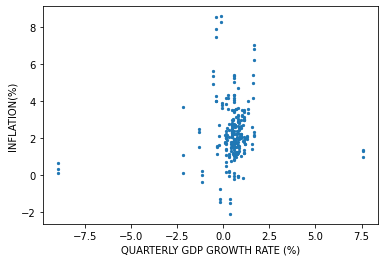

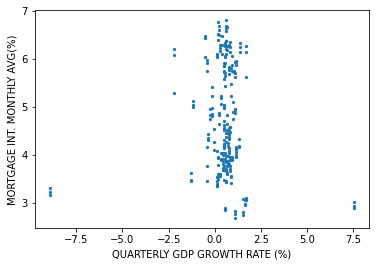

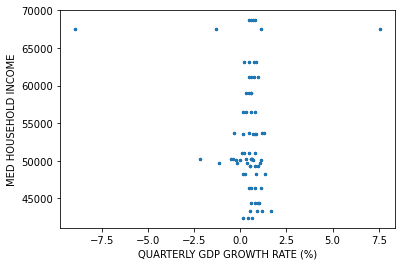

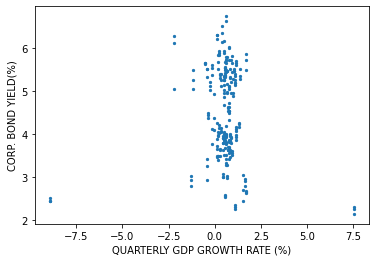

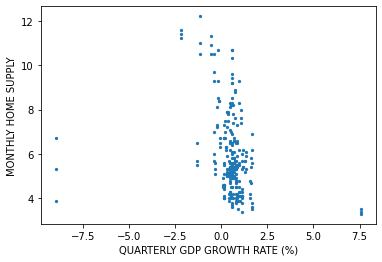

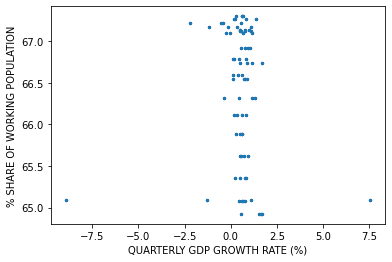

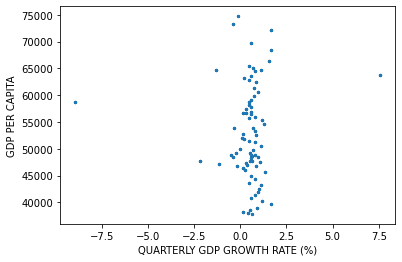

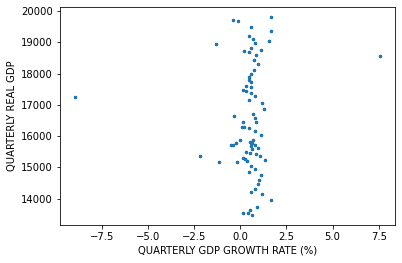

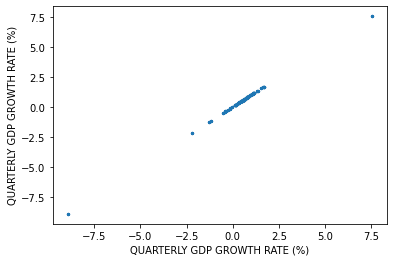

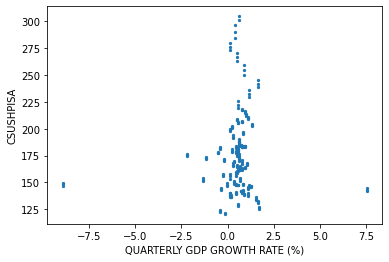

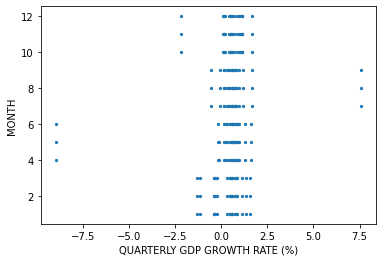

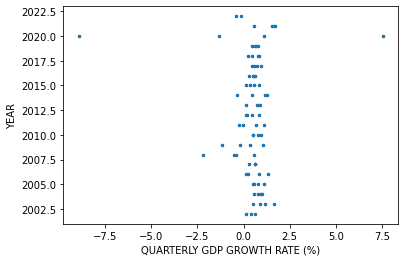

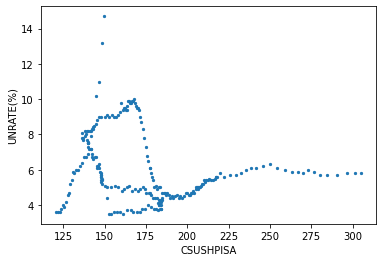

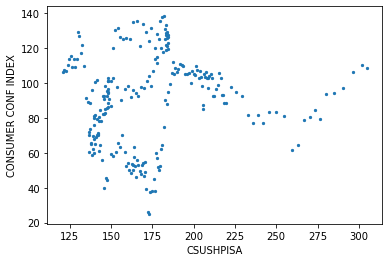

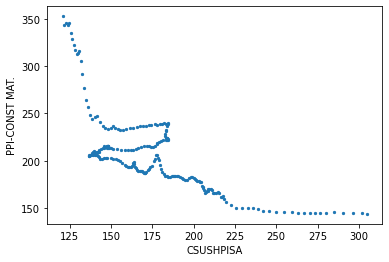

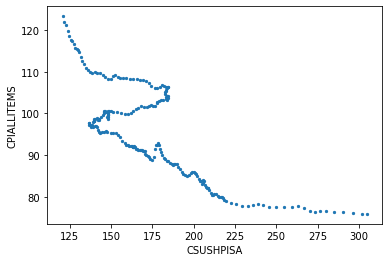

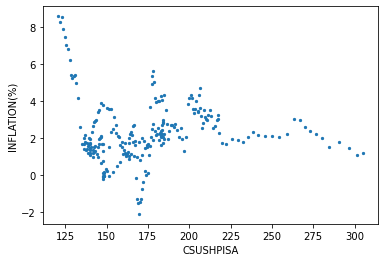

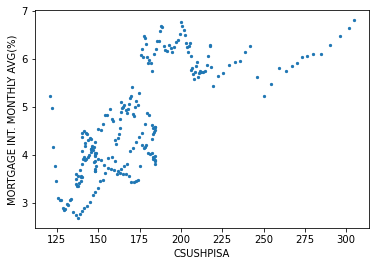

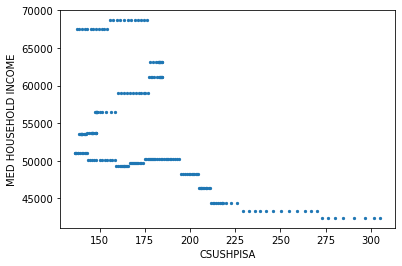

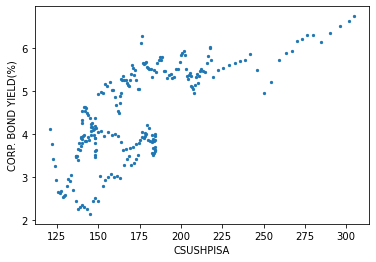

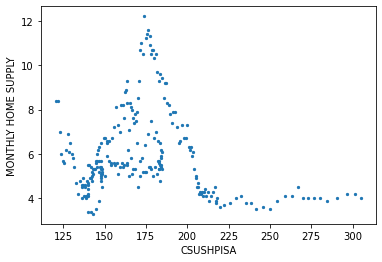

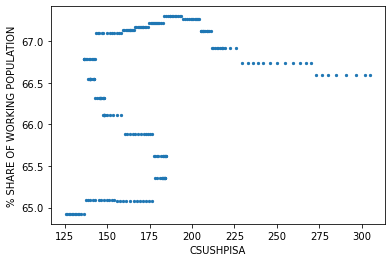

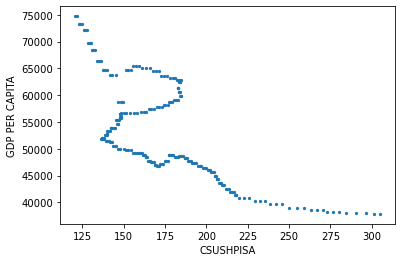

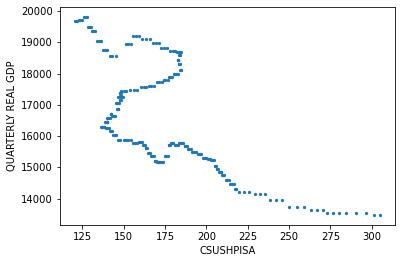

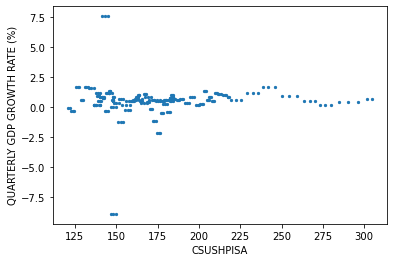

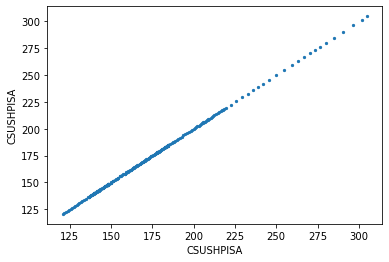

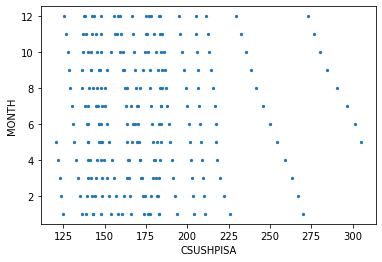

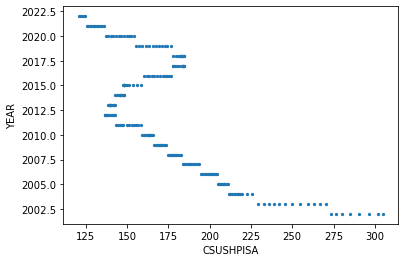

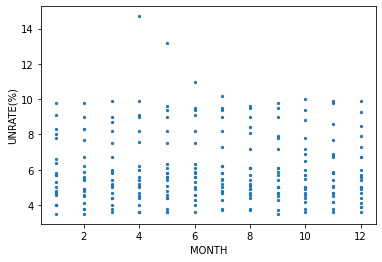

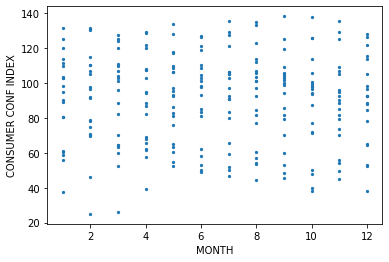

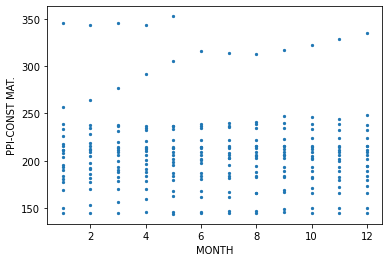

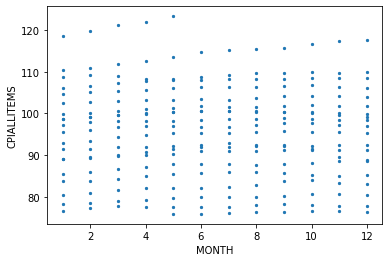

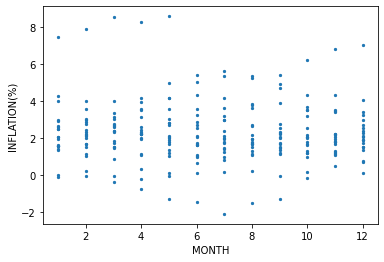

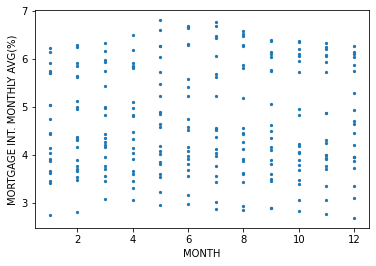

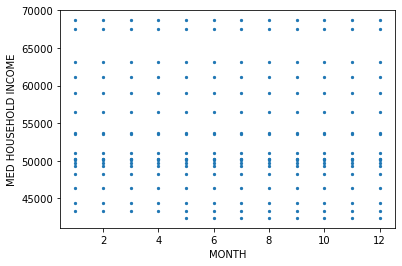

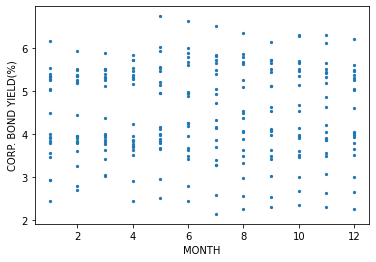

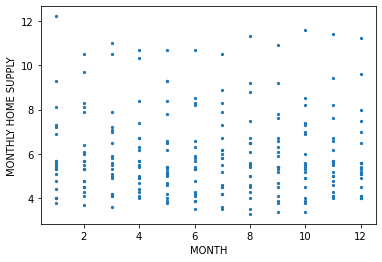

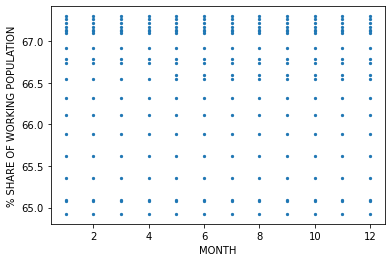

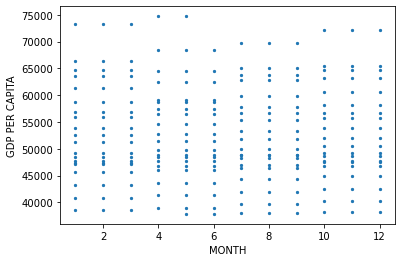

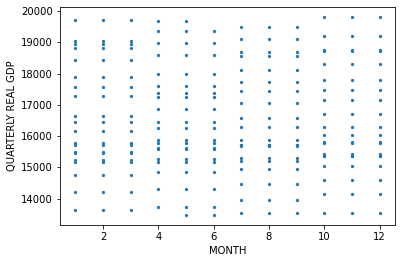

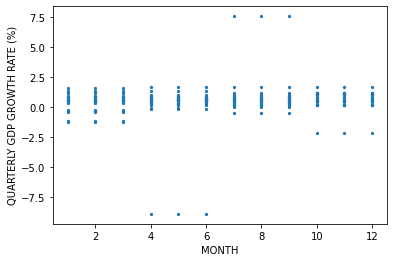

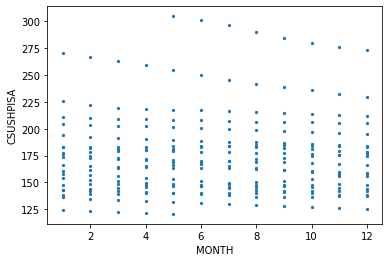

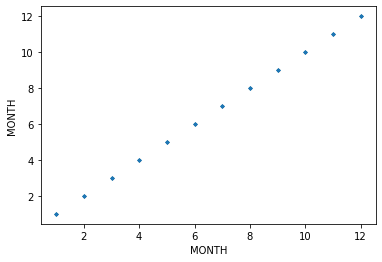

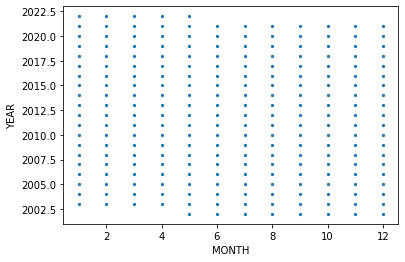

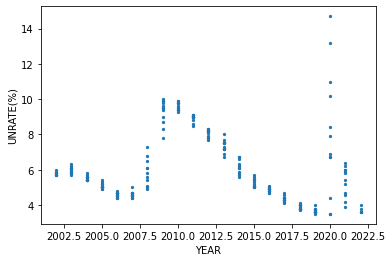

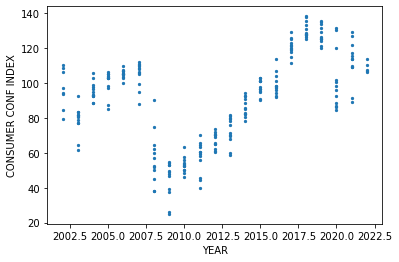

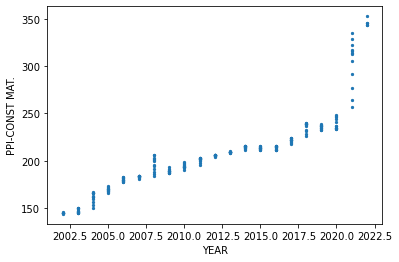

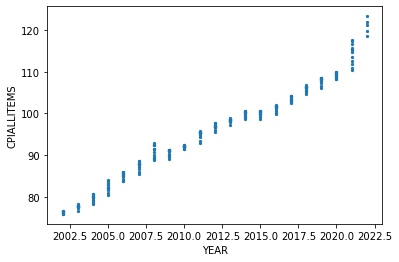

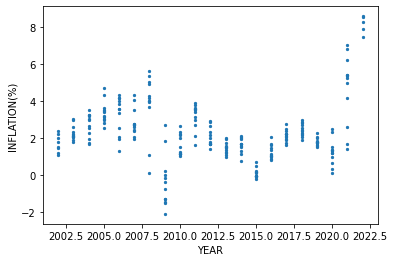

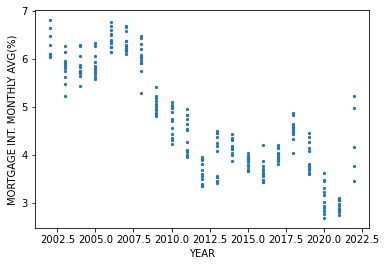

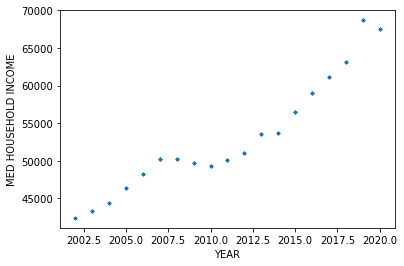

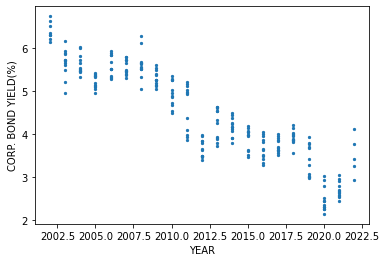

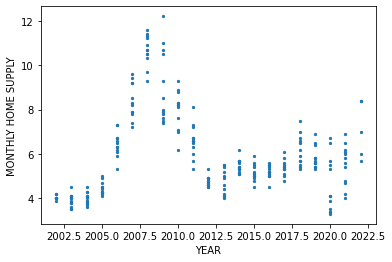

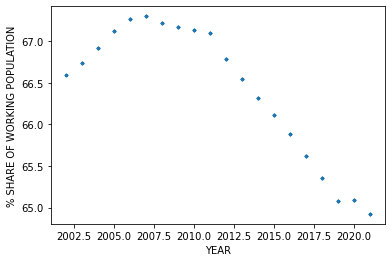

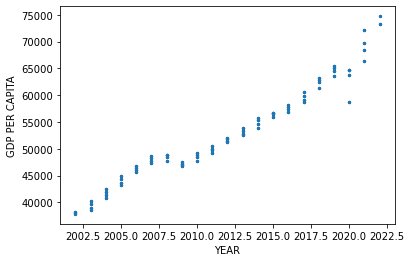

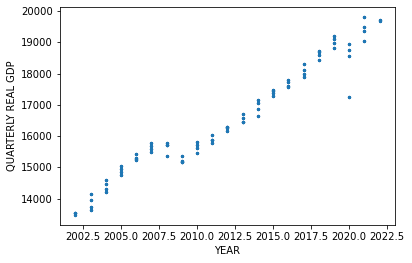

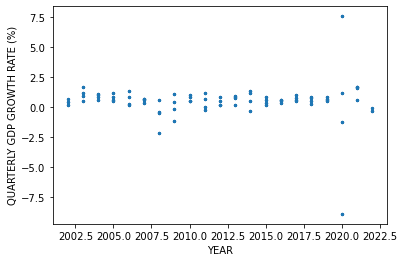

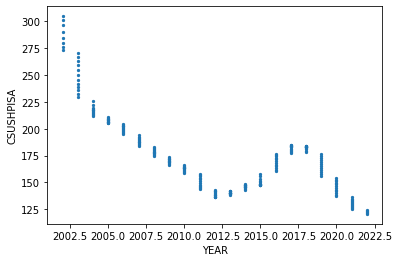

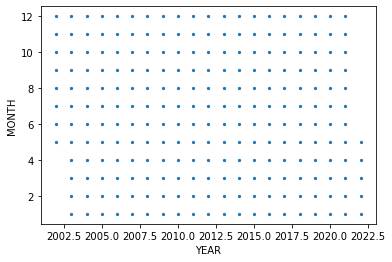

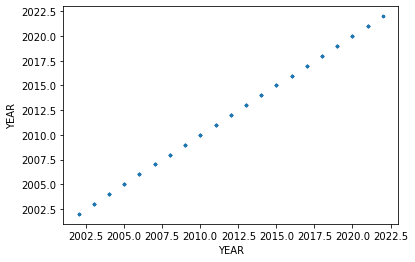

In [15]:
columns=data1.columns

for i in columns:
    for j in columns:
        data1.plot.scatter(x =i, y =j, s = 5)
    
pass

### Following points were observed as anticipated.
- Median Household income and Consumer confidence index decrease with increased unemployment.
- Unemployment was high in the period of recession and pandemic.
- Consumer Price Index, Producers Purchase Index- Construction Material, Median household income and Gross Domestic Product have increased over the years.
- Mortgae interest rate and Corporate bond yield has decreased over the years.
- Housing Price Index has decreased with increase in Consumer Price Index, Producers Purchase Index-Construction Material and Gross Domestic Product.

#### Visualizing Distribution plot of all variables.

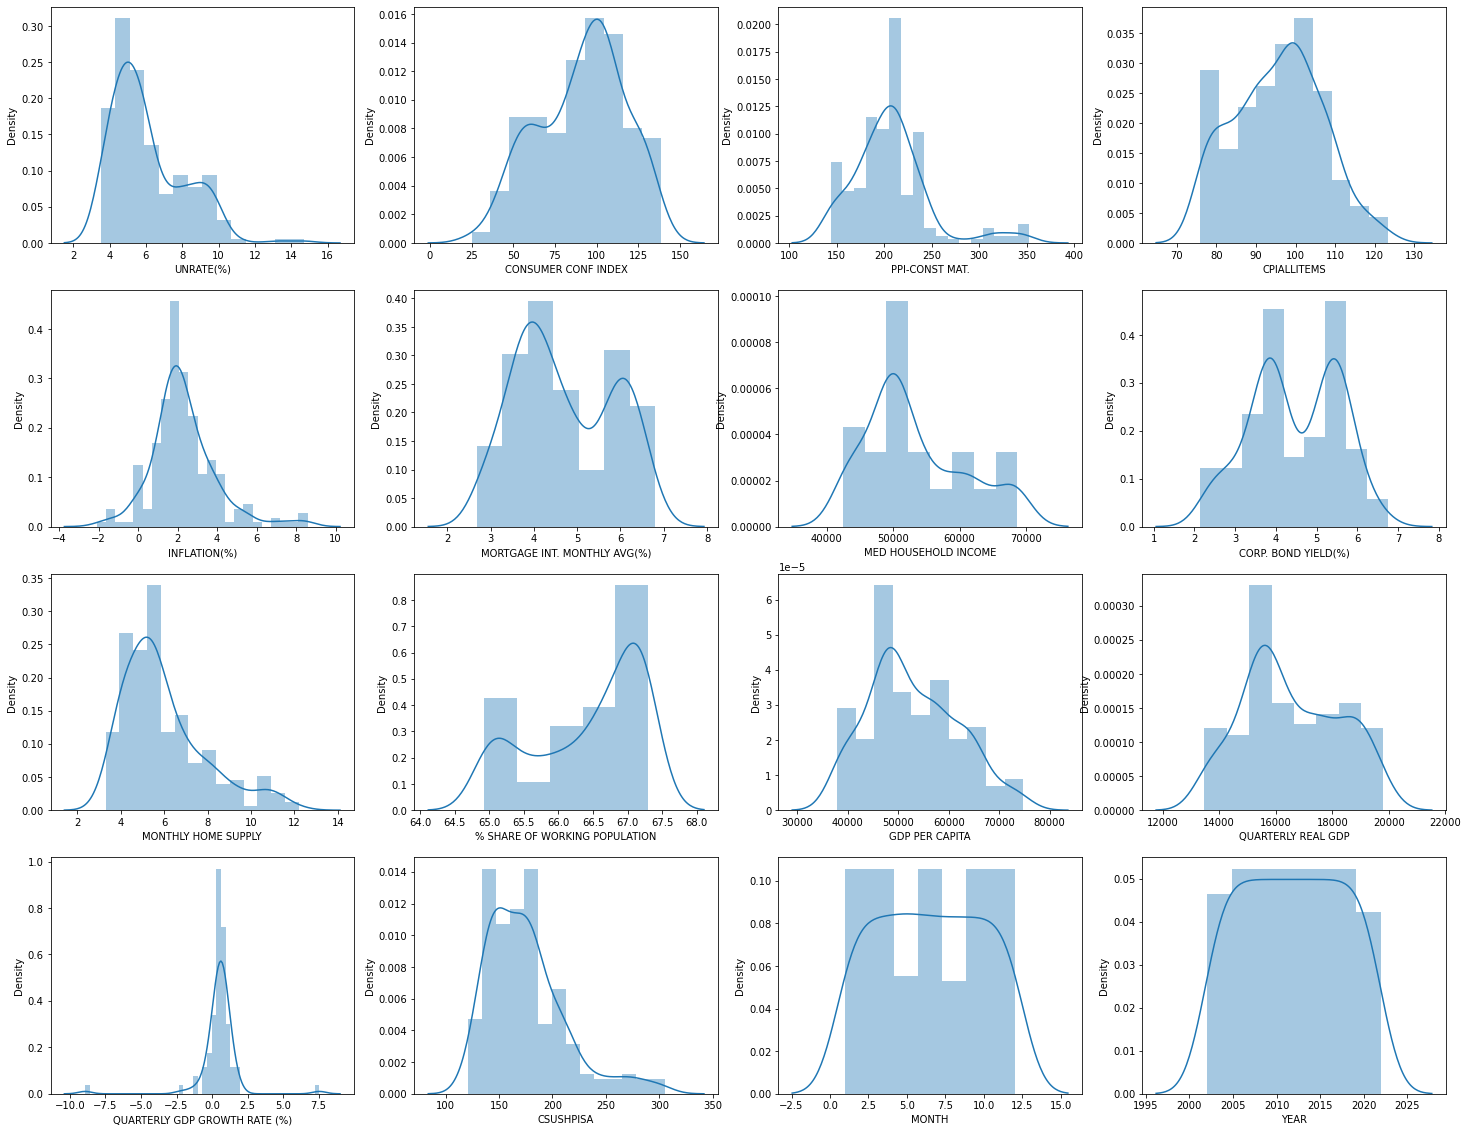

In [16]:
k=1
plt.figure(figsize=(25,20))
for i in columns:
    plt.subplot(4,4,k)
    sns.distplot(data1[i])
    k+=1

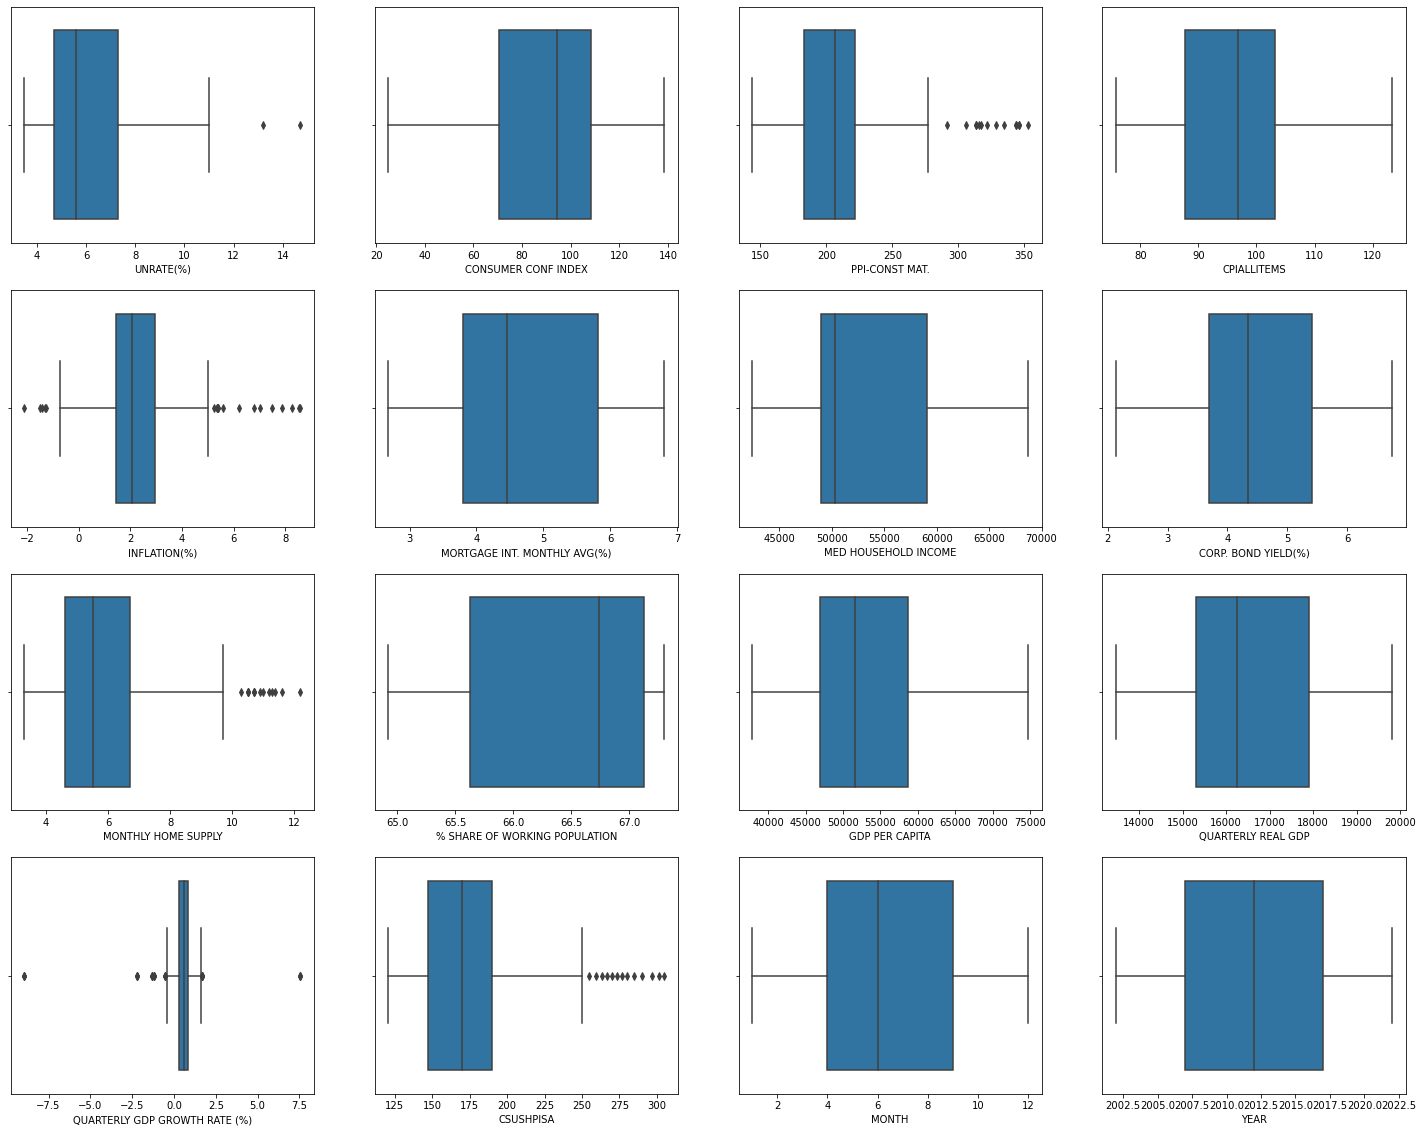

In [17]:
k=1
plt.figure(figsize=(25,20))
for i in columns:
    plt.subplot(4,4,k)
    sns.boxplot(data1[i])
    k+=1

### Correlation of Data

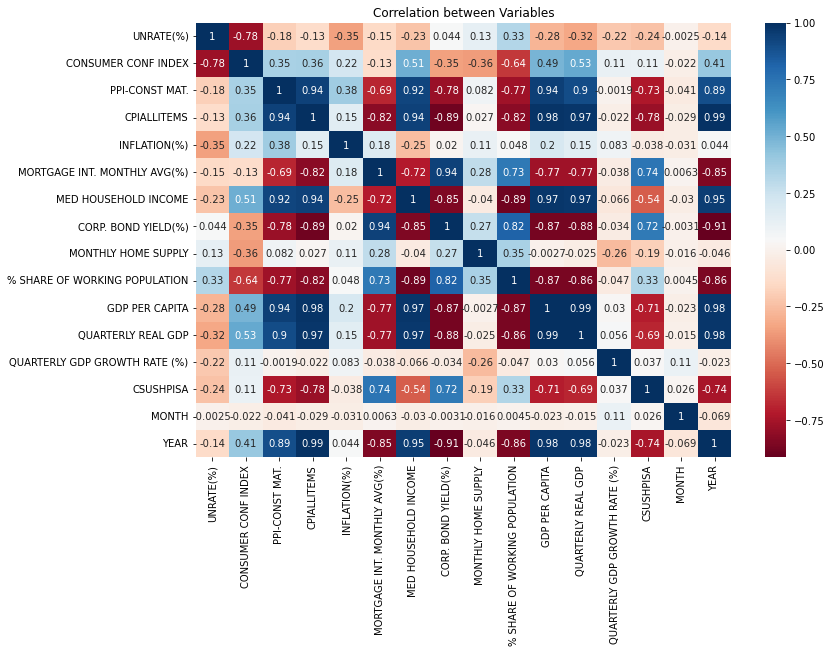

In [18]:
plt.figure(figsize=(12, 8))
sns.heatmap(data1.corr(),cmap='RdBu', annot = True)
plt.title("Correlation between Variables")
plt.show()

### Imputing missing values in % Working Population and Median Income by KNN Imputer

In [19]:
# Imputing with KNNImputer

from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler

#Defining a subset of the dataset
df_knn = data1.filter(['YEAR','GDP PER CAPITA','CORP. BOND YIELD(%)','CPIALLITEMS','MED HOUSEHOLD INCOME','% SHARE OF WORKING POPULATION'], axis=1).copy()

# Define scaler to set values between 0 and 1

# Define KNN imputer and fill missing values
knn_imputer = KNNImputer(n_neighbors=5, weights='uniform', metric='nan_euclidean')
df_knn_imputed = pd.DataFrame(knn_imputer.fit_transform(df_knn), columns=df_knn.columns)

In [20]:
data1['MED HOUSEHOLD INCOME']=df_knn_imputed['MED HOUSEHOLD INCOME']

In [21]:
data1['% SHARE OF WORKING POPULATION']=df_knn_imputed['% SHARE OF WORKING POPULATION']

In [22]:
data1.isnull().sum()

UNRATE(%)                        0
CONSUMER CONF INDEX              0
PPI-CONST MAT.                   0
CPIALLITEMS                      0
INFLATION(%)                     0
MORTGAGE INT. MONTHLY AVG(%)     0
MED HOUSEHOLD INCOME             0
CORP. BOND YIELD(%)              0
MONTHLY HOME SUPPLY              0
% SHARE OF WORKING POPULATION    0
GDP PER CAPITA                   0
QUARTERLY REAL GDP               0
QUARTERLY GDP GROWTH RATE (%)    0
CSUSHPISA                        0
MONTH                            0
YEAR                             0
dtype: int64

In [23]:
data1.to_csv('Data1.csv')

In [24]:
data1.head()

UNRATE(%)  CONSUMER CONF INDEX  PPI-CONST MAT.  CPIALLITEMS  INFLATION(%)  \
0        3.6                106.4         352.857   123.322800      8.581511   
1        3.6                107.3         343.730   121.978170      8.258629   
2        3.6                107.2         345.852   121.301004      8.542456   
3        3.8                110.5         343.583   119.702806      7.871064   
4        4.0                113.8         345.742   118.619339      7.479872   

   MORTGAGE INT. MONTHLY AVG(%)  MED HOUSEHOLD INCOME  CORP. BOND YIELD(%)  \
0                        5.2300               68703.0                 4.13   
1                        4.9825               68703.0                 3.76   
2                        4.1720               68703.0                 3.43   
3                        3.7625               68703.0                 3.25   
4                        3.4450               68703.0                 2.93   

   MONTHLY HOME SUPPLY  % SHARE OF WORKING POPULATION  GDP PER CAPITA  \
0                  8.4                      64.924129           74737   
1                  8.4                      64.924129           74737   
2                  7.0                      64.924129           73289   
3                  6.0                      64.924129           73289   
4                  5.7                      64.924129           73289   

   QUARTERLY REAL GDP  QUARTERLY GDP GROWTH RATE (%)  CSUSHPISA  MONTH  YEAR  
0           19699.465                      -0.144227    120.724      5  2022  
1           19699.465                      -0.144227    121.813      4  2022  
2           19727.918                      -0.395692    122.888      3  2022  
3           19727.918                      -0.395692    123.831      2  2022  
4           19727.918                      -0.395692    124.780      1  2022

### Splitting the Data into Training and Testing Sets

In [25]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
#np.random.seed(0)
data1_train, data1_test = train_test_split(data1, train_size = 0.7, random_state = 100)

### Rescaling the features

#### Min-Max Scaling

In [26]:
from sklearn.preprocessing import MinMaxScaler

In [27]:
scaler = MinMaxScaler()
#Fit on data
data1_train= pd.DataFrame(scaler.fit_transform(data1_train),columns=data1.columns)
data1_train.head()

UNRATE(%)  CONSUMER CONF INDEX  PPI-CONST MAT.  CPIALLITEMS  INFLATION(%)  \
0   0.257732             0.458554        0.027744     0.046224      0.346472   
1   0.195876             0.598765        0.103799     0.099559      0.494571   
2   0.226804             0.686949        0.344404     0.479190      0.133632   
3   0.113402             0.702822        0.176507     0.205341      0.574078   
4   0.134021             0.721340        0.162157     0.168006      0.502011   

   MORTGAGE INT. MONTHLY AVG(%)  MED HOUSEHOLD INCOME  CORP. BOND YIELD(%)  \
0                      0.792819              0.034571             0.766667   
1                      0.738962              0.073211             0.726667   
2                      0.239204              0.536510             0.268889   
3                      0.969918              0.220278             0.808889   
4                      0.865721              0.220278             0.688889   

   MONTHLY HOME SUPPLY  % SHARE OF WORKING POPULATION  GDP PER CAPITA  \
0             0.056180                       0.764470        0.067847   
1             0.112360                       0.841314        0.127478   
2             0.168539                       0.501094        0.492394   
3             0.337079                       0.985051        0.223147   
4             0.314607                       0.985051        0.211921   

   QUARTERLY REAL GDP  QUARTERLY GDP GROWTH RATE (%)  CSUSHPISA     MONTH  \
0            0.103339                       0.612158   0.624506  0.818182   
1            0.178267                       0.604150   0.498199  0.909091   
2            0.600937                       0.591489   0.148278  0.000000   
3            0.285067                       0.557049   0.435356  0.454545   
4            0.279152                       0.623964   0.451145  0.090909   

   YEAR  
0  0.05  
1  0.10  
2  0.65  
3  0.20  
4  0.20

In [28]:
#Divide the data into X and y
y_train = data1_train.pop('CSUSHPISA')
X_train = data1_train

### Building model using statsmodel, for the detailed statistics

In [29]:
import statsmodels.api as sm

In [30]:
X_train = sm.add_constant(X_train)

In [31]:
# Running the linear model 
lm = sm.OLS(y_train,X_train).fit()

In [32]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:              CSUSHPISA   R-squared:                       0.959
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     237.9
Date:                Sat, 03 Sep 2022   Prob (F-statistic):           2.70e-97
Time:                        12:05:08   Log-Likelihood:                 297.34
No. Observations:                 168   AIC:                            -562.7
Df Residuals:                     152   BIC:                            -512.7
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

### Checking VIF

Variance Inflation Factor or VIF, gives a basic quantitative idea about how much the feature variables are correlated with each other. It is an extremely important parameter to test our linear model.

In [33]:
#Dropping constant
X_train = X_train.drop(['const'], axis=1)

In [34]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features      VIF
10                 GDP PER CAPITA  4602.69
11             QUARTERLY REAL GDP  2572.63
14                           YEAR  1914.42
3                     CPIALLITEMS  1399.95
2                  PPI-CONST MAT.   276.82
6            MED HOUSEHOLD INCOME   255.73
5    MORTGAGE INT. MONTHLY AVG(%)   150.13
7             CORP. BOND YIELD(%)   145.95
12  QUARTERLY GDP GROWTH RATE (%)    75.25
9   % SHARE OF WORKING POPULATION    73.84
1             CONSUMER CONF INDEX    62.45
0                       UNRATE(%)    35.30
4                    INFLATION(%)    25.13
8             MONTHLY HOME SUPPLY    15.54
13                          MONTH     8.02

#### Now lets drop the variable having high p value. We can see MED HOUSEHOLD INCOME has high p value.

In [35]:
#Drop MED HOUSEHOLD INCOME
X_train_new1 = X_train.drop(["MED HOUSEHOLD INCOME"], axis = 1)

#### Rebuilding the model

In [36]:
#Build a model
X_train_lm1 = sm.add_constant(X_train_new1)
lm1 = sm.OLS(y_train,X_train_lm1).fit()
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:              CSUSHPISA   R-squared:                       0.959
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     256.5
Date:                Sat, 03 Sep 2022   Prob (F-statistic):           1.65e-98
Time:                        12:05:09   Log-Likelihood:                 297.34
No. Observations:                 168   AIC:                            -564.7
Df Residuals:                     153   BIC:                            -517.8
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

In [37]:
#Drop the constant term B0
X_train_lm1 = X_train_lm1.drop(['const'], axis=1)

In [38]:
# Calculate the VIFs for the new model
vif = pd.DataFrame()
X = X_train_lm1
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features      VIF
9                  GDP PER CAPITA  3978.19
10             QUARTERLY REAL GDP  2554.11
13                           YEAR  1913.50
3                     CPIALLITEMS  1285.81
2                  PPI-CONST MAT.   248.68
6             CORP. BOND YIELD(%)   138.86
5    MORTGAGE INT. MONTHLY AVG(%)   138.17
11  QUARTERLY GDP GROWTH RATE (%)    75.14
1             CONSUMER CONF INDEX    60.96
8   % SHARE OF WORKING POPULATION    49.11
0                       UNRATE(%)    25.62
4                    INFLATION(%)    25.09
7             MONTHLY HOME SUPPLY    14.27
12                          MONTH     7.57

#### Lets drop MORTGAGE INT. MONTHLY AVG(%) due to its p value

In [39]:
X_train_new2 = X_train_lm1.drop(['MORTGAGE INT. MONTHLY AVG(%)'], axis=1)

In [40]:
#Build a model
X_train_lm2 = sm.add_constant(X_train_new2)
lm2 = sm.OLS(y_train,X_train_lm2).fit()
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:              CSUSHPISA   R-squared:                       0.959
Model:                            OLS   Adj. R-squared:                  0.956
Method:                 Least Squares   F-statistic:                     278.0
Date:                Sat, 03 Sep 2022   Prob (F-statistic):          9.94e-100
Time:                        12:05:10   Log-Likelihood:                 297.31
No. Observations:                 168   AIC:                            -566.6
Df Residuals:                     154   BIC:                            -522.9
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

In [41]:
#Drop the constant term B0
X_train_lm2 = X_train_lm2.drop(['const'], axis=1)

In [42]:
# Calculate the VIFs for the new model
vif = pd.DataFrame()
X = X_train_lm2
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features      VIF
8                  GDP PER CAPITA  3382.75
9              QUARTERLY REAL GDP  2492.18
12                           YEAR  1673.19
3                     CPIALLITEMS  1278.10
2                  PPI-CONST MAT.   201.79
10  QUARTERLY GDP GROWTH RATE (%)    74.79
1             CONSUMER CONF INDEX    50.03
5             CORP. BOND YIELD(%)    49.10
7   % SHARE OF WORKING POPULATION    49.10
0                       UNRATE(%)    25.12
4                    INFLATION(%)    24.10
6             MONTHLY HOME SUPPLY    13.39
11                          MONTH     7.11

#### Lets drop GDP PER CAPITA

In [43]:
X_train_new3 = X_train_lm2.drop(['GDP PER CAPITA'], axis=1)

In [44]:
#Build a model
X_train_lm3 = sm.add_constant(X_train_new3)
lm3 = sm.OLS(y_train,X_train_lm3).fit()
print(lm3.summary())

                            OLS Regression Results                            
Dep. Variable:              CSUSHPISA   R-squared:                       0.959
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     299.7
Date:                Sat, 03 Sep 2022   Prob (F-statistic):          1.28e-100
Time:                        12:05:10   Log-Likelihood:                 296.41
No. Observations:                 168   AIC:                            -566.8
Df Residuals:                     155   BIC:                            -526.2
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

In [45]:
#Drop the constant term B0
X_train_lm3 = X_train_lm3.drop(['const'], axis=1)

In [46]:
# Calculate the VIFs for the new model
vif = pd.DataFrame()
X = X_train_lm3
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features      VIF
11                           YEAR  1654.97
8              QUARTERLY REAL GDP  1174.51
3                     CPIALLITEMS  1059.80
2                  PPI-CONST MAT.    92.25
9   QUARTERLY GDP GROWTH RATE (%)    73.11
5             CORP. BOND YIELD(%)    48.78
1             CONSUMER CONF INDEX    47.99
7   % SHARE OF WORKING POPULATION    36.56
0                       UNRATE(%)    25.10
4                    INFLATION(%)    24.03
6             MONTHLY HOME SUPPLY    12.85
10                          MONTH     7.10

#### Dropping Year due to high VIF value

In [47]:
X_train_new4 = X_train_lm3.drop(['YEAR'], axis=1)

In [48]:
#Build a model
X_train_lm4 = sm.add_constant(X_train_new4)
lm4 = sm.OLS(y_train,X_train_lm4).fit()
print(lm4.summary())

                            OLS Regression Results                            
Dep. Variable:              CSUSHPISA   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.954
Method:                 Least Squares   F-statistic:                     314.9
Date:                Sat, 03 Sep 2022   Prob (F-statistic):          1.82e-100
Time:                        12:05:10   Log-Likelihood:                 292.88
No. Observations:                 168   AIC:                            -561.8
Df Residuals:                     156   BIC:                            -524.3
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

In [49]:
#Drop the constant term B0
X_train_lm4 = X_train_lm4.drop(['const'], axis=1)

In [50]:
# Calculate the VIFs for the new model
vif = pd.DataFrame()
X = X_train_lm4
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features     VIF
8              QUARTERLY REAL GDP  572.16
3                     CPIALLITEMS  519.26
2                  PPI-CONST MAT.   72.74
9   QUARTERLY GDP GROWTH RATE (%)   72.42
1             CONSUMER CONF INDEX   47.95
5             CORP. BOND YIELD(%)   44.13
7   % SHARE OF WORKING POPULATION   30.61
4                    INFLATION(%)   18.21
0                       UNRATE(%)   12.59
6             MONTHLY HOME SUPPLY   10.63
10                          MONTH    3.94

#### Dropping Unemployment rate due to high p-value

In [51]:
X_train_new5 = X_train_lm4.drop(['UNRATE(%)'], axis=1)

In [52]:
#Build a model
X_train_lm5 = sm.add_constant(X_train_new5)
lm5 = sm.OLS(y_train,X_train_lm5).fit()
print(lm5.summary())

                            OLS Regression Results                            
Dep. Variable:              CSUSHPISA   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.954
Method:                 Least Squares   F-statistic:                     346.6
Date:                Sat, 03 Sep 2022   Prob (F-statistic):          1.47e-101
Time:                        12:05:11   Log-Likelihood:                 292.41
No. Observations:                 168   AIC:                            -562.8
Df Residuals:                     157   BIC:                            -528.5
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

In [53]:
#Drop the constant term B0
X_train_lm5 = X_train_lm5.drop(['const'], axis=1)

In [54]:
# Calculate the VIFs for the new model
vif = pd.DataFrame()
X = X_train_lm5
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features     VIF
7             QUARTERLY REAL GDP  412.00
2                    CPIALLITEMS  325.06
1                 PPI-CONST MAT.   72.24
8  QUARTERLY GDP GROWTH RATE (%)   62.52
0            CONSUMER CONF INDEX   47.42
4            CORP. BOND YIELD(%)   44.11
6  % SHARE OF WORKING POPULATION   27.86
3                   INFLATION(%)   16.34
5            MONTHLY HOME SUPPLY   10.59
9                          MONTH    3.94

#### Lets drop QUARTERLY GDP GROWTH RATE (%) due to high p-value

In [55]:
X_train_new6 = X_train_lm5.drop(['QUARTERLY GDP GROWTH RATE (%)'], axis=1)

In [56]:
#Build a model
X_train_lm6 = sm.add_constant(X_train_new6)
lm6 = sm.OLS(y_train,X_train_lm6).fit()
print(lm6.summary())

                            OLS Regression Results                            
Dep. Variable:              CSUSHPISA   R-squared:                       0.956
Model:                            OLS   Adj. R-squared:                  0.953
Method:                 Least Squares   F-statistic:                     378.1
Date:                Sat, 03 Sep 2022   Prob (F-statistic):          4.68e-102
Time:                        12:05:12   Log-Likelihood:                 290.42
No. Observations:                 168   AIC:                            -560.8
Df Residuals:                     158   BIC:                            -529.6
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

In [57]:
#Drop the constant term B0
X_train_lm6 = X_train_lm6.drop(['const'], axis=1)

In [58]:
# Calculate the VIFs for the new model
vif = pd.DataFrame()
X = X_train_lm6
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features     VIF
7             QUARTERLY REAL GDP  347.90
2                    CPIALLITEMS  315.76
1                 PPI-CONST MAT.   71.75
0            CONSUMER CONF INDEX   45.97
4            CORP. BOND YIELD(%)   32.44
6  % SHARE OF WORKING POPULATION   20.95
3                   INFLATION(%)   16.34
5            MONTHLY HOME SUPPLY    6.91
8                          MONTH    3.87

#### Dropping QUARTERLY REAL GDP due to high VIF value

In [59]:
X_train_new7 = X_train_lm6.drop(['QUARTERLY REAL GDP'], axis=1)

In [60]:
#Build a model
X_train_lm7 = sm.add_constant(X_train_new7)
lm7 = sm.OLS(y_train,X_train_lm7).fit()
print(lm7.summary())

                            OLS Regression Results                            
Dep. Variable:              CSUSHPISA   R-squared:                       0.952
Model:                            OLS   Adj. R-squared:                  0.950
Method:                 Least Squares   F-statistic:                     397.9
Date:                Sat, 03 Sep 2022   Prob (F-statistic):          5.50e-101
Time:                        12:05:12   Log-Likelihood:                 284.57
No. Observations:                 168   AIC:                            -551.1
Df Residuals:                     159   BIC:                            -523.0
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

In [61]:
#Drop the constant term B0
X_train_lm7 = X_train_lm7.drop(['const'], axis=1)

In [62]:
# Calculate the VIFs for the new model
vif = pd.DataFrame()
X = X_train_lm7
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
1                 PPI-CONST MAT.  69.30
2                    CPIALLITEMS  62.94
4            CORP. BOND YIELD(%)  27.51
6  % SHARE OF WORKING POPULATION  20.54
3                   INFLATION(%)  16.31
0            CONSUMER CONF INDEX  14.51
5            MONTHLY HOME SUPPLY   5.42
7                          MONTH   3.79

#### Lets drop PPI-CONST MAT.	due to high VIF

In [63]:
X_train_new8 = X_train_lm7.drop(['PPI-CONST MAT.'], axis=1)

In [64]:
#Build a model
X_train_lm8 = sm.add_constant(X_train_new8)
lm8 = sm.OLS(y_train,X_train_lm8).fit()
print(lm8.summary())

                            OLS Regression Results                            
Dep. Variable:              CSUSHPISA   R-squared:                       0.945
Model:                            OLS   Adj. R-squared:                  0.943
Method:                 Least Squares   F-statistic:                     394.3
Date:                Sat, 03 Sep 2022   Prob (F-statistic):           1.99e-97
Time:                        12:05:13   Log-Likelihood:                 272.69
No. Observations:                 168   AIC:                            -529.4
Df Residuals:                     160   BIC:                            -504.4
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

In [65]:
#Drop the constant term B0
X_train_lm8 = X_train_lm8.drop(['const'], axis=1)

In [66]:
# Calculate the VIFs for the new model
vif = pd.DataFrame()
X = X_train_lm8
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
3            CORP. BOND YIELD(%)  27.45
5  % SHARE OF WORKING POPULATION  17.42
0            CONSUMER CONF INDEX  13.24
1                    CPIALLITEMS  11.02
2                   INFLATION(%)   7.40
4            MONTHLY HOME SUPPLY   5.22
6                          MONTH   3.79

#### Lets drop CORP. BOND YIELD(%)	due to high VIF

In [67]:
X_train_new9 = X_train_lm8.drop(['CORP. BOND YIELD(%)'], axis=1)

In [68]:
#Build a model
X_train_lm9 = sm.add_constant(X_train_new9)
lm9 = sm.OLS(y_train,X_train_lm9).fit()
print(lm9.summary())

                            OLS Regression Results                            
Dep. Variable:              CSUSHPISA   R-squared:                       0.937
Model:                            OLS   Adj. R-squared:                  0.935
Method:                 Least Squares   F-statistic:                     400.1
Date:                Sat, 03 Sep 2022   Prob (F-statistic):           5.39e-94
Time:                        12:05:14   Log-Likelihood:                 261.18
No. Observations:                 168   AIC:                            -508.4
Df Residuals:                     161   BIC:                            -486.5
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

In [69]:
#Drop the constant term B0
X_train_lm9 = X_train_lm9.drop(['const'], axis=1)

In [70]:
# Calculate the VIFs for the new model
vif = pd.DataFrame()
X = X_train_lm9
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
0            CONSUMER CONF INDEX  7.95
1                    CPIALLITEMS  7.81
2                   INFLATION(%)  7.00
4  % SHARE OF WORKING POPULATION  5.89
3            MONTHLY HOME SUPPLY  4.73
5                          MONTH  3.79

#### Lets drop MONTH due to high p-value

In [71]:
X_train_new10 = X_train_lm9.drop(['MONTH'], axis=1)

In [72]:
#Build a model
X_train_lm10 = sm.add_constant(X_train_new10)
lm10 = sm.OLS(y_train,X_train_lm10).fit()
print(lm10.summary())

                            OLS Regression Results                            
Dep. Variable:              CSUSHPISA   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.934
Method:                 Least Squares   F-statistic:                     475.4
Date:                Sat, 03 Sep 2022   Prob (F-statistic):           7.96e-95
Time:                        12:05:14   Log-Likelihood:                 259.90
No. Observations:                 168   AIC:                            -507.8
Df Residuals:                     162   BIC:                            -489.1
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

In [73]:
#Drop the constant term B0
X_train_lm10 = X_train_lm10.drop(['const'], axis=1)

In [74]:
# Calculate the VIFs for the new model
vif = pd.DataFrame()
X = X_train_lm10
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
0            CONSUMER CONF INDEX  7.90
2                   INFLATION(%)  7.00
1                    CPIALLITEMS  6.93
4  % SHARE OF WORKING POPULATION  4.65
3            MONTHLY HOME SUPPLY  4.56

### Now our model is good with p-values and VIF under the acceptable range

### Residual Analysis of the train data

In [75]:
X_train_lm10=sm.add_constant(X_train_lm10)
X_train_lm10.head()

const  CONSUMER CONF INDEX  CPIALLITEMS  INFLATION(%)  MONTHLY HOME SUPPLY  \
0    1.0             0.458554     0.046224      0.346472             0.056180   
1    1.0             0.598765     0.099559      0.494571             0.112360   
2    1.0             0.686949     0.479190      0.133632             0.168539   
3    1.0             0.702822     0.205341      0.574078             0.337079   
4    1.0             0.721340     0.168006      0.502011             0.314607   

   % SHARE OF WORKING POPULATION  
0                       0.764470  
1                       0.841314  
2                       0.501094  
3                       0.985051  
4                       0.985051

In [76]:
#y train predicted
y_train_pred = lm10.predict(X_train_lm10)

In [77]:
# Importing the required libraries for plots.
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<Figure size 432x288 with 0 Axes>

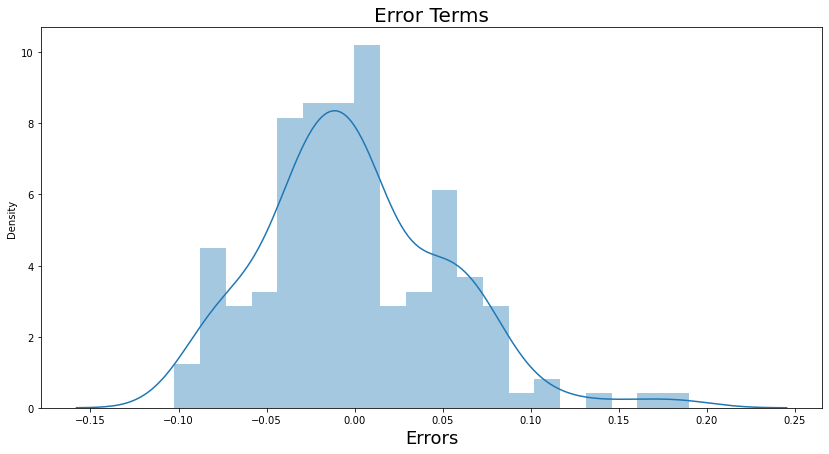

In [78]:
# Plot the histogram of the error terms

fig = plt.figure()
plt.figure(figsize=(14,7))
sns.distplot((y_train - y_train_pred), bins = 20)
plt.title('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)  # X-label
plt.show()

#### We can see Error terms are approximately normally distributed

### Making Predictions

#### Applying Scaling on Test Data

In [79]:
#Fit on data
data1_test= pd.DataFrame(scaler.transform(data1_test),columns=data1.columns)
data1_test.head()

UNRATE(%)  CONSUMER CONF INDEX  PPI-CONST MAT.  CPIALLITEMS  INFLATION(%)  \
0   0.432990             0.393298        0.312355     0.465492      0.340188   
1   0.659794             0.216049        0.217166     0.324723      0.326237   
2   0.103093             0.663139        0.188944     0.205341      0.348626   
3   0.567010             0.338624        0.267391     0.388165      0.410498   
4   0.154639             0.716049        0.111931     0.138672      0.459087   

   MORTGAGE INT. MONTHLY AVG(%)  MED HOUSEHOLD INCOME  CORP. BOND YIELD(%)  \
0                      0.205847              0.425040             0.366667   
1                      0.531538              0.280216             0.653333   
2                      0.902111              0.220278             0.724444   
3                      0.522077              0.290751             0.640000   
4                      0.730471              0.148969             0.624444   

   MONTHLY HOME SUPPLY  % SHARE OF WORKING POPULATION  GDP PER CAPITA  \
0             0.089888                       0.685038        0.399463   
1             0.483146                       0.946228        0.262087   
2             0.382022                       0.985051        0.230523   
3             0.438202                       0.914174        0.310275   
4             0.101124                       0.924423        0.175990   

   QUARTERLY REAL GDP  QUARTERLY GDP GROWTH RATE (%)  CSUSHPISA     MONTH  \
0            0.468346                       0.594793   0.100930  0.090909   
1            0.300493                       0.606936   0.253195  0.909091   
2            0.288700                       0.551278   0.420826  0.727273   
3            0.362234                       0.527537   0.189466  0.181818   
4            0.233678                       0.589809   0.469716  0.545455   

   YEAR  
0  0.55  
1  0.35  
2  0.20  
3  0.45  
4  0.15

In [80]:
#Dividing into X_test and y_test
y_test = data1_test.pop('CSUSHPISA')
X_test = data1_test
X_test.describe()

UNRATE(%)  CONSUMER CONF INDEX  PPI-CONST MAT.  CPIALLITEMS  \
count  73.000000            73.000000       73.000000    73.000000   
mean    0.288236             0.562671        0.292952     0.412130   
std     0.232648             0.244737        0.164179     0.221807   
min     0.000000             0.114638        0.005740     0.008000   
25%     0.123711             0.328924        0.209512     0.270481   
50%     0.206186             0.612875        0.295135     0.425464   
75%     0.474227             0.723104        0.373582     0.579176   
max     1.154639             0.976190        0.955639     0.923731   

       INFLATION(%)  MORTGAGE INT. MONTHLY AVG(%)  MED HOUSEHOLD INCOME  \
count     73.000000                     73.000000             73.000000   
mean       0.358058                      0.477995              0.459198   
std        0.154602                      0.264576              0.312054   
min       -0.066983                      0.030568              0.000000   
25%        0.289827                      0.251334              0.261162   
50%        0.344980                      0.403202              0.327375   
75%        0.437267                      0.737142              0.712216   
max        0.929014                      0.931587              1.000000   

       CORP. BOND YIELD(%)  MONTHLY HOME SUPPLY  \
count            73.000000            73.000000   
mean              0.482344             0.304602   
std               0.240348             0.228821   
min              -0.024444             0.011236   
25%               0.320000             0.134831   
50%               0.431111             0.235955   
75%               0.691111             0.382022   
max               0.915556             0.932584   

       % SHARE OF WORKING POPULATION  GDP PER CAPITA  QUARTERLY REAL GDP  \
count                      73.000000       73.000000           73.000000   
mean                        0.612964        0.402592            0.479750   
std                         0.350004        0.226459            0.261690   
min                         0.000000        0.006481            0.008593   
25%                         0.294454        0.247227            0.288700   
50%                         0.764470        0.361879            0.427025   
75%                         0.928401        0.566342            0.698264   
max                         1.000000        0.960734            0.987617   

       QUARTERLY GDP GROWTH RATE (%)      MONTH       YEAR  
count                      73.000000  73.000000  73.000000  
mean                        0.562383   0.489415   0.495205  
std                         0.114872   0.326244   0.287852  
min                         0.000000   0.000000   0.000000  
25%                         0.559962   0.181818   0.300000  
50%                         0.576603   0.545455   0.500000  
75%                         0.594793   0.818182   0.750000  
max                         1.000000   1.000000   1.000000

In [81]:
X_train_new10.columns

Index(['CONSUMER CONF INDEX', 'CPIALLITEMS', 'INFLATION(%)',
       'MONTHLY HOME SUPPLY', '% SHARE OF WORKING POPULATION'],
      dtype='object')

In [82]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new10.columns]

# Adding a constant variable 
X_test_new1 = sm.add_constant(X_test_new)
X_test_new1.head()

const  CONSUMER CONF INDEX  CPIALLITEMS  INFLATION(%)  MONTHLY HOME SUPPLY  \
0    1.0             0.393298     0.465492      0.340188             0.089888   
1    1.0             0.216049     0.324723      0.326237             0.483146   
2    1.0             0.663139     0.205341      0.348626             0.382022   
3    1.0             0.338624     0.388165      0.410498             0.438202   
4    1.0             0.716049     0.138672      0.459087             0.101124   

   % SHARE OF WORKING POPULATION  
0                       0.685038  
1                       0.946228  
2                       0.985051  
3                       0.914174  
4                       0.924423

In [83]:
# Making predictions
y_pred = lm10.predict(X_test_new1)

### Finding R-squared and Adjusted R-Squared for Test set

In [84]:
#Evaluate R-square for test
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.9244291379170114

In [85]:
#Adjusted R^2
#adj r2=1-(1-R2)*(n-1)/(n-p-1)

#n =sample size , p = number of independent variables
n = X_test.shape[0]
p = X_test.shape[1]


Adj_r2=1-(1-0.75783003115855)*(n-1)/(n-p-1)
print(Adj_r2)

0.6941010919897472


### Final Result Comparison between Train model and Test:

* Train R^2 :  0.936

* Train Adjusted R^2 : 0.934

* Test R^2: 0.924

* Test Adjusted R^2: 0.694

### We can see that the equation of our best fitted line is:

### $ CSUSHPISA=         0.1042\times Consumer Confidence Index-   1.4675   \times CPIALLITEMS + 0.0870 \times Inflation + 0.2091 \times Monthly Home Supply - 0.6057 \times Share of Working Population + 1.1204  $

### Making Predictions using different Regression Models

### Preprocessing Data
#### Applying Log Transformation to get Target variable normally distributed as it is left skewed.

In [86]:
data2=data1[['CONSUMER CONF INDEX','CPIALLITEMS','INFLATION(%)','MONTHLY HOME SUPPLY','% SHARE OF WORKING POPULATION','CSUSHPISA']]

In [87]:
data2['CSUSHPISA']=np.log(data2['CSUSHPISA'])

<AxesSubplot:xlabel='CSUSHPISA', ylabel='Density'>

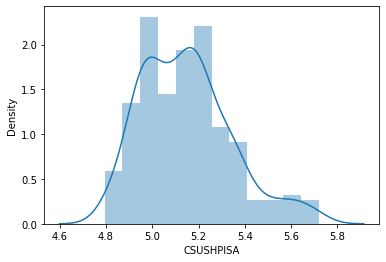

In [88]:
sns.distplot(data2['CSUSHPISA'])

In [89]:
Y=data2['CSUSHPISA']
X=data2.drop(columns=['CSUSHPISA'])

#### Splitting Data into Traiin and Test Set

In [90]:
X_train,X_test,Y_train,Y_test=train_test_split(X, Y, test_size=0.2, random_state=2)

### Linear Regression Model

In [91]:
from sklearn.linear_model import LinearRegression

In [97]:
Lin_reg = LinearRegression()
Lin_reg.fit(X_train,Y_train)
print(Lin_reg.intercept_)
print(Lin_reg.coef_)
print('R2 Train Data',Lin_reg.score(X_train,Y_train))
print('R2 Test Data',Lin_reg.score(X_test,Y_test))

23.004165087227165
[ 0.00144979 -0.02970241  0.00345573  0.02866257 -0.23092384]
R2 Train Data 0.940675805986738
R2 Test Data 0.9034668554486142


### Random Forest Regressor

In [94]:
from sklearn.ensemble import RandomForestRegressor as rfr
from sklearn import metrics
Rfr = rfr(n_estimators = 200, criterion = 'mse',
                              random_state = 1,
                              n_jobs = -1)
Rfr.fit(X_train,Y_train)
X_train_pred = Rfr.predict(X_train)
X_test_pred = Rfr.predict(X_test)

print('MSE train data: %.3f, MSE test data: %.3f' % 
      (metrics.mean_squared_error(X_train_pred, Y_train),
       metrics.mean_squared_error(X_test_pred, Y_test)))
print('R2 train data: %.3f, R2 test data: %.3f' % 
      (metrics.r2_score(X_train_pred, Y_train),
       metrics.r2_score(X_test_pred, Y_test)))

MSE train data: 0.000, MSE test data: 0.001
R2 train data: 0.999, R2 test data: 0.980


### XGBoost Regressor

In [95]:
import xgboost
regressor=xgboost.XGBRegressor()

In [96]:
regressor=xgboost.XGBRegressor()
regressor.fit(X_train,Y_train)
Y_train_pred=regressor.predict(X_train)
Y_test_pred=regressor.predict(X_test)
print('R2 train data: %.3f, R2 test data: %.3f' % 
      (metrics.r2_score(Y_train_pred, Y_train),
       metrics.r2_score(Y_test_pred, Y_test)))

R2 train data: 1.000, R2 test data: 0.980


In [100]:
Y_pred=regressor.predict(X)

In [101]:
Y_pred=np.exp(Y_pred)

In [102]:
Y_pred

array([120.846924, 121.80426 , 122.938484, 123.65534 , 125.06238 ,
       125.710175, 126.749794, 127.381935, 128.39693 , 129.49118 ,
       135.06377 , 130.99327 , 131.62509 , 137.46835 , 137.91481 ,
       134.97903 , 136.34361 , 137.4629  , 138.84454 , 140.09314 ,
       139.07486 , 143.34166 , 145.01929 , 149.7668  , 150.11357 ,
       151.70038 , 151.50453 , 152.70424 , 154.16801 , 155.8503  ,
       158.10535 , 158.8815  , 161.5087  , 163.73479 , 165.54892 ,
       169.19284 , 169.36711 , 170.81638 , 173.24461 , 174.29344 ,
       176.5526  , 182.44296 , 179.95058 , 181.00273 , 182.14803 ,
       183.16426 , 184.22966 , 184.37257 , 184.21132 , 183.11578 ,
       183.41676 , 182.6814  , 182.92459 , 183.64964 , 179.39696 ,
       184.06326 , 184.15343 , 184.12341 , 183.88562 , 183.0553  ,
       181.72578 , 180.84639 , 179.20987 , 177.78218 , 175.3972  ,
       175.3284  , 174.88979 , 174.1274  , 173.33873 , 171.34338 ,
       170.33032 , 172.39442 , 166.59605 , 165.00104 , 164.258

In [103]:
data1['PredCSUSHPISA']=Y_pred

In [104]:
data1.to_csv('data2.csv')